# Create PyWGCNA object

In [5]:
import PyWGCNA
import pandas as pd
import numpy as np
import random

In [6]:
# Read in matrix made from all 48 samples
TPM = pd.read_csv("/data/class/cosmos2023/PUBLIC/ta-github/data/tpm_matrix_all_samples.tsv", sep='\t', index_col=0)
TPM['gene_id'] = TPM['gene_id'].str.split('.').str[0]

# WGCNA requires gene id
TPM = TPM.set_index(TPM['gene_id'])

# df can only have numbers, no strings
TPM.drop(["gene_name.1", "gene_id"], axis = 1, inplace=True)

# samples in rows, genes in columns
TPM = TPM.T

In [7]:
# Read in metadata file; only really care about certain columns for plotting purposes
metadata = pd.read_csv("/data/class/cosmos2023/PUBLIC/ta-github/data/fshd_metadata.csv", 
                       usecols=['Run', 'Sample', 'Individual', 'fshd_status', 'day_of_differentiation'])

# Filter the 'metadata' DataFrame based on the 'Sample' values
filtered_metadata = metadata[metadata['Sample'].isin(TPM.index)]

# Reorder the rows in 'metadata' to match the order of indices in 'TPM'
filtered_metadata = filtered_metadata.set_index('Sample').loc[TPM.index].reset_index()

# set index to be run name (no underscores)
filtered_metadata.index = filtered_metadata['Run']

# remove random index column from metadata
filtered_metadata.drop('index', axis=1, inplace=True)

# Replace underscores with spaces in column names
filtered_metadata.rename(columns=lambda x: x.replace('_', ' '), inplace=True)

In [8]:
# set index to be run name (no underscores)
TPM.index = filtered_metadata['Run']

# remove Run column
filtered_metadata.drop('Run', axis=1, inplace=True)


In [5]:
TPM.head()

gene_id      ENSG00000223972  ENSG00000227232  ENSG00000278267  \
Run                                                              
SRR10870740         0.000000         0.118793              0.0   
SRR10870737         0.000014         0.075637              0.0   
SRR10870753         0.000000         0.367225              0.0   
SRR10870724         0.052862         1.231710              0.0   
SRR10870759         0.000000         0.451011              0.0   

gene_id      ENSG00000243485  ENSG00000284332  ENSG00000237613  \
Run                                                              
SRR10870740              0.0              0.0              0.0   
SRR10870737              0.0              0.0              0.0   
SRR10870753              0.0              0.0              0.0   
SRR10870724              0.0              0.0              0.0   
SRR10870759              0.0              0.0              0.0   

gene_id      ENSG00000268020  ENSG00000240361  ENSG00000186092  \
Run                                                              
SRR10870740              0.0              0.0              0.0   
SRR10870737              0.0              0.0              0.0   
SRR10870753              0.0              0.0              0.0   
SRR10870724              0.0              0.0              0.0   
SRR10870759              0.0              0.0              0.0   

gene_id      ENSG00000238009  ...  ENSG00000273532  ENSG00000276351  \
Run                           ...                                     
SRR10870740              0.0  ...              0.0              0.0   
SRR10870737              0.0  ...              0.0              0.0   
SRR10870753              0.0  ...              0.0              0.0   
SRR10870724              0.0  ...              0.0              0.0   
SRR10870759              0.0  ...              0.0              0.0   

gene_id      ENSG00000275661  ENSG00000277856  ENSG00000275063  \
Run                                                              
SRR10870740              0.0              0.0              0.0   
SRR10870737              0.0              0.0              0.0   
SRR10870753              0.0              0.0              0.0   
SRR10870724              0.0              0.0              0.0   
SRR10870759              0.0              0.0              0.0   

gene_id      ENSG00000271254  ENSG00000275405  ENSG00000275987  \
Run                                                              
SRR10870740        13.946960              0.0              0.0   
SRR10870737         2.953329              0.0              0.0   
SRR10870753         3.603548              0.0              0.0   
SRR10870724         3.864989              0.0              0.0   
SRR10870759        18.500010              0.0              0.0   

gene_id      ENSG00000277475  ENSG00000268674  
Run                                            
SRR10870740         0.150276              0.0  
SRR10870737         0.000000              0.0  
SRR10870753         0.000000              0.0  
SRR10870724         0.000000              0.0  
SRR10870759         0.000000              0.0  

[5 rows x 58884 columns]

In [6]:
filtered_metadata.head()

day of differentiation fshd status Individual
Run                                                      
SRR10870740                  Day 2     Control  Control-2
SRR10870737                  Day 1     Control  Control-2
SRR10870753                  Day 3       FSHD2    FSHD2-2
SRR10870724                  Day 0     Control  Control-1
SRR10870759                  Day 0       FSHD2    FSHD2-1

In [7]:
fshd = PyWGCNA.WGCNA(name='fshd_example', 
                        species='Human', 
                        geneExp=TPM, 
                        save=True)

Saving data to be True, checking requirements ...


# Preprocess including removing outlier genes and samples

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



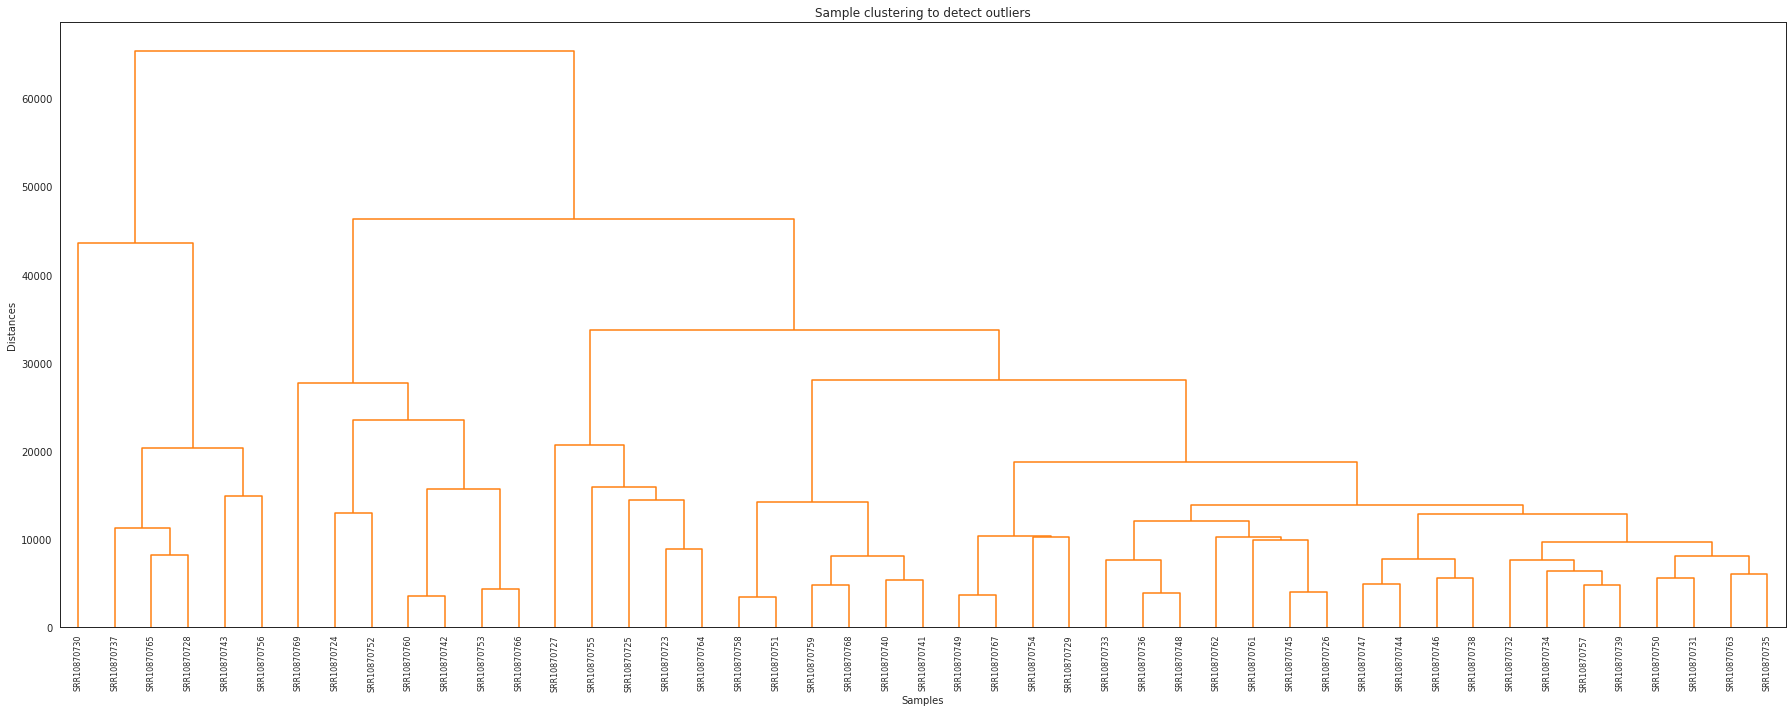

In [8]:
fshd.preprocess()

# Running PyWGCNA and finding modules

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2656
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.108207  0.464591       0.678389  2380.222064  2402.011747   
1       2  0.172234 -0.350578       0.690066   981.685479   956.668039   
2       3   0.54843 -0.839891        0.86718   502.134124   452.091783   
3       4  0.704166 -1.094565       0.943839   291.828698   237.581052   
4       5  0.774733 -1.263294          0.964   184.625487   135.598494   
5       6  0.821662 -1.378972       0.968396   124.124686    81.255292   
6       7  0.873271 -1.428368       0.981041    87.376063    50.348323   
7       8    0.8996 -1.480306       0.979794    63.775478    32.134598   
8       9  0.919773 -1.523355       0.979506    47.939579    21.153002   
9      10  0.931652 -1.555262       0.976226    36.929689      14.2558   
10     11  0.940411 -1.572975       0.970721    29.046368     9.754756   
11     13

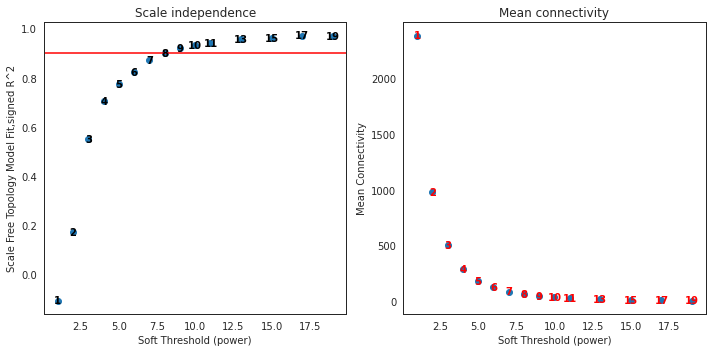

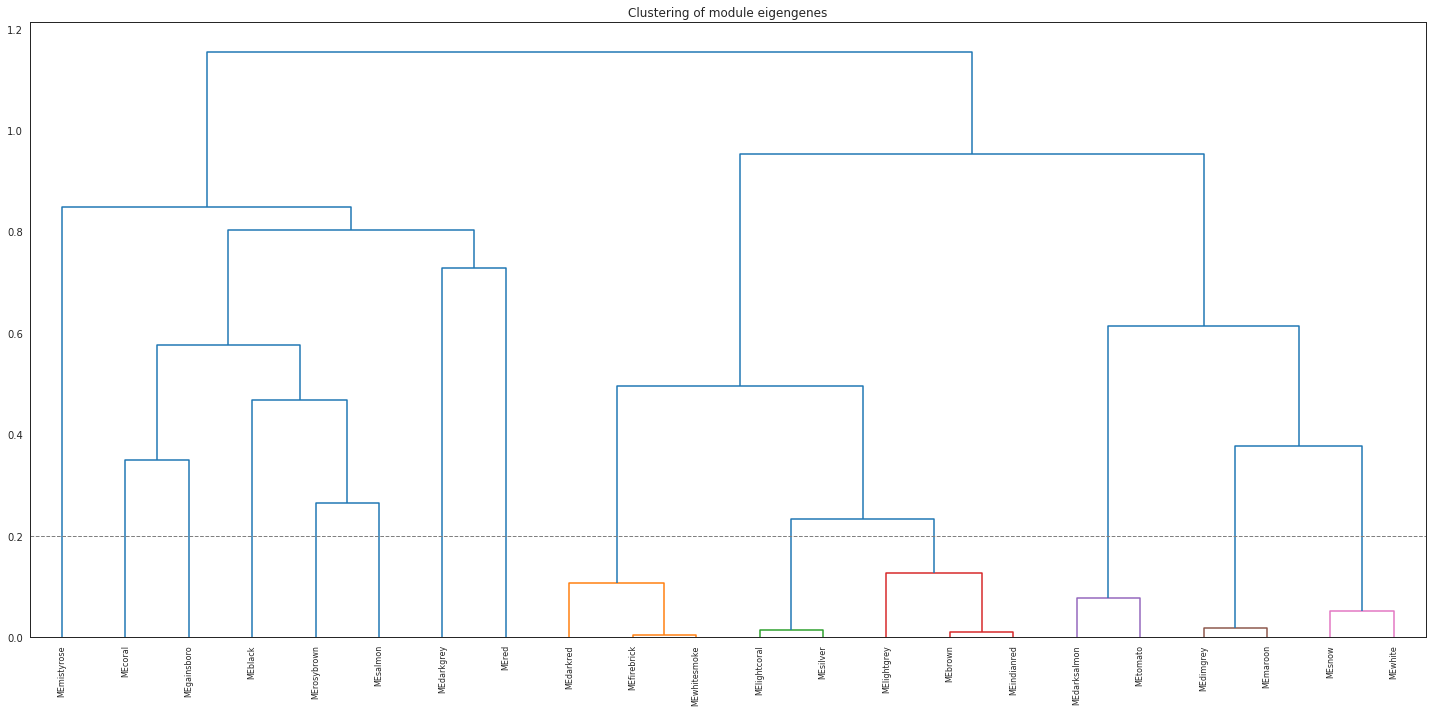

In [9]:
## Running PyWGCNA and finding modules
fshd.findModules()

# Analyzing results including plotting module-trait relationship heatmap, eigengene heatmap and barplot, and GO term analysis for each module

In [9]:
fshd.updateSampleInfo(sampleInfo=filtered_metadata)
# add color for metadata
fshd.setMetadataColor('fshd status', 
                      {"Control": "blue", 
                       "FSHD2": "black"})
fshd.setMetadataColor('Individual', 
                      {"Control-1": "blue", 
                       "Control-2": "cyan", 
                       "FSHD2-1": "black", 
                       "FSHD2-2": "grey"})
fshd.setMetadataColor('day of differentiation', 
                      {'Day 0': 'red',
                       'Day 1': 'orange',
                       'Day 2': 'yellow',
                       'Day 3': 'green',
                       'Day 4': 'blue',
                       'Day 5': 'purple'})

geneList = PyWGCNA.getGeneList(dataset='hsapiens_gene_ensembl',
                              attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'])


Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

Updating gene information based on given gene list ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
	Done..



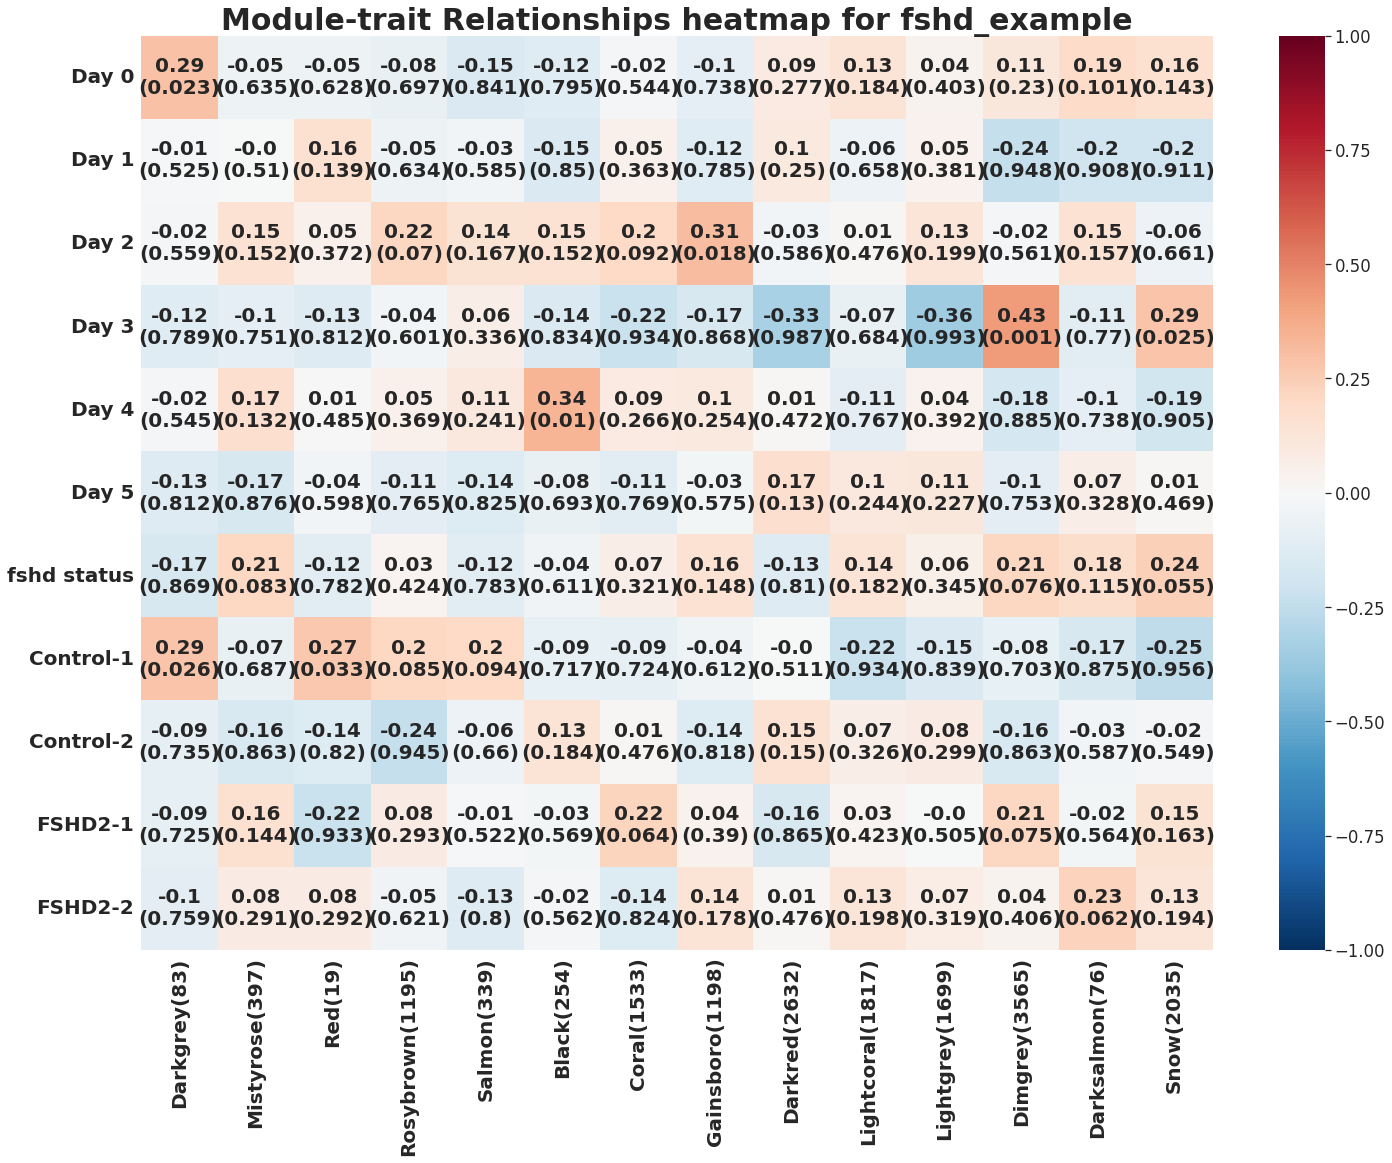

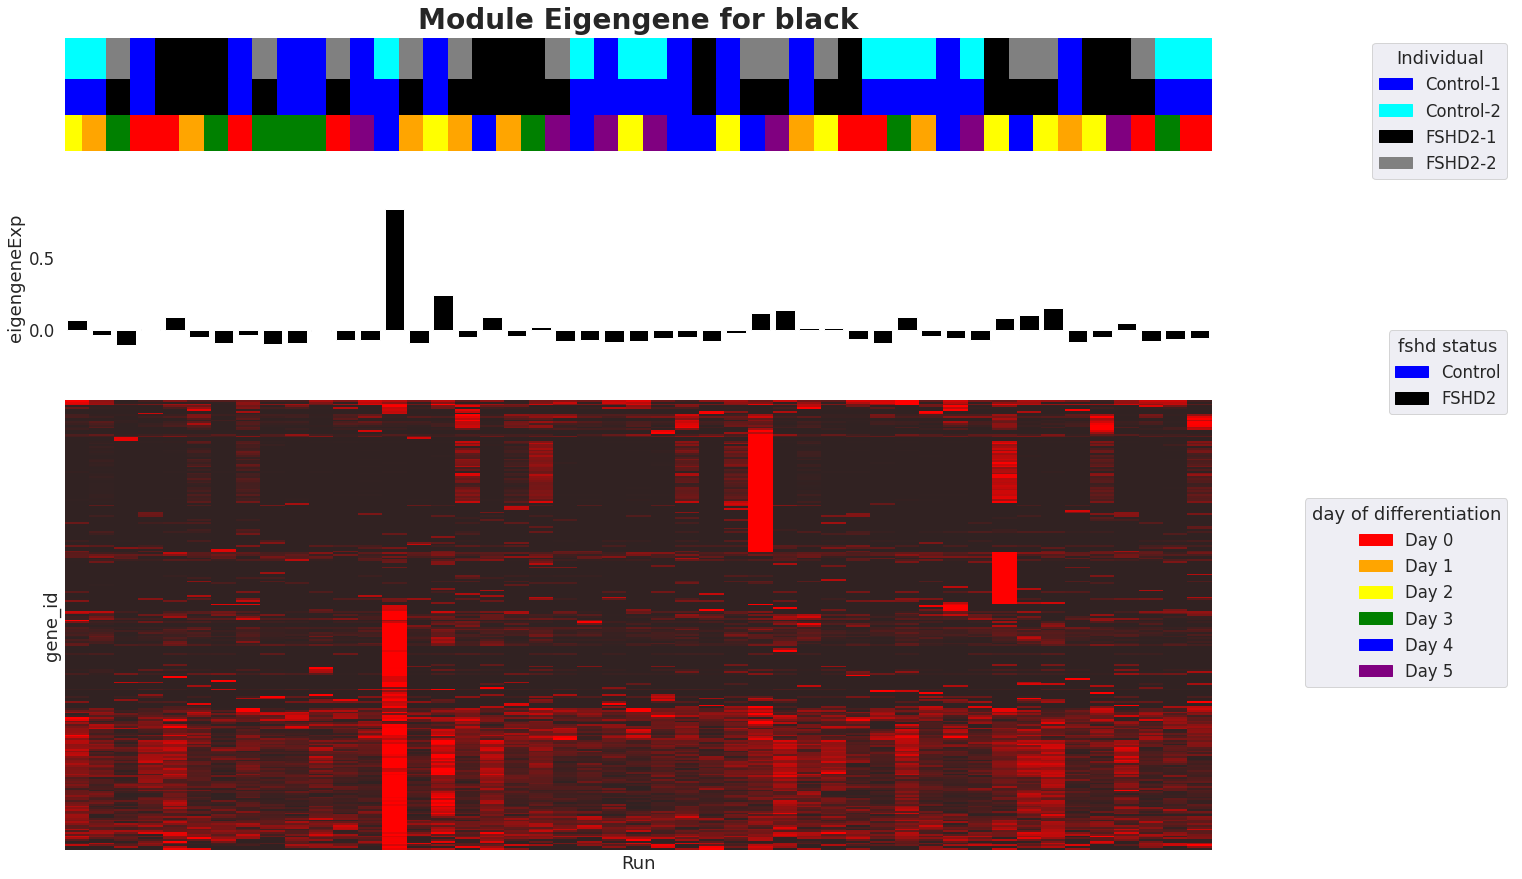

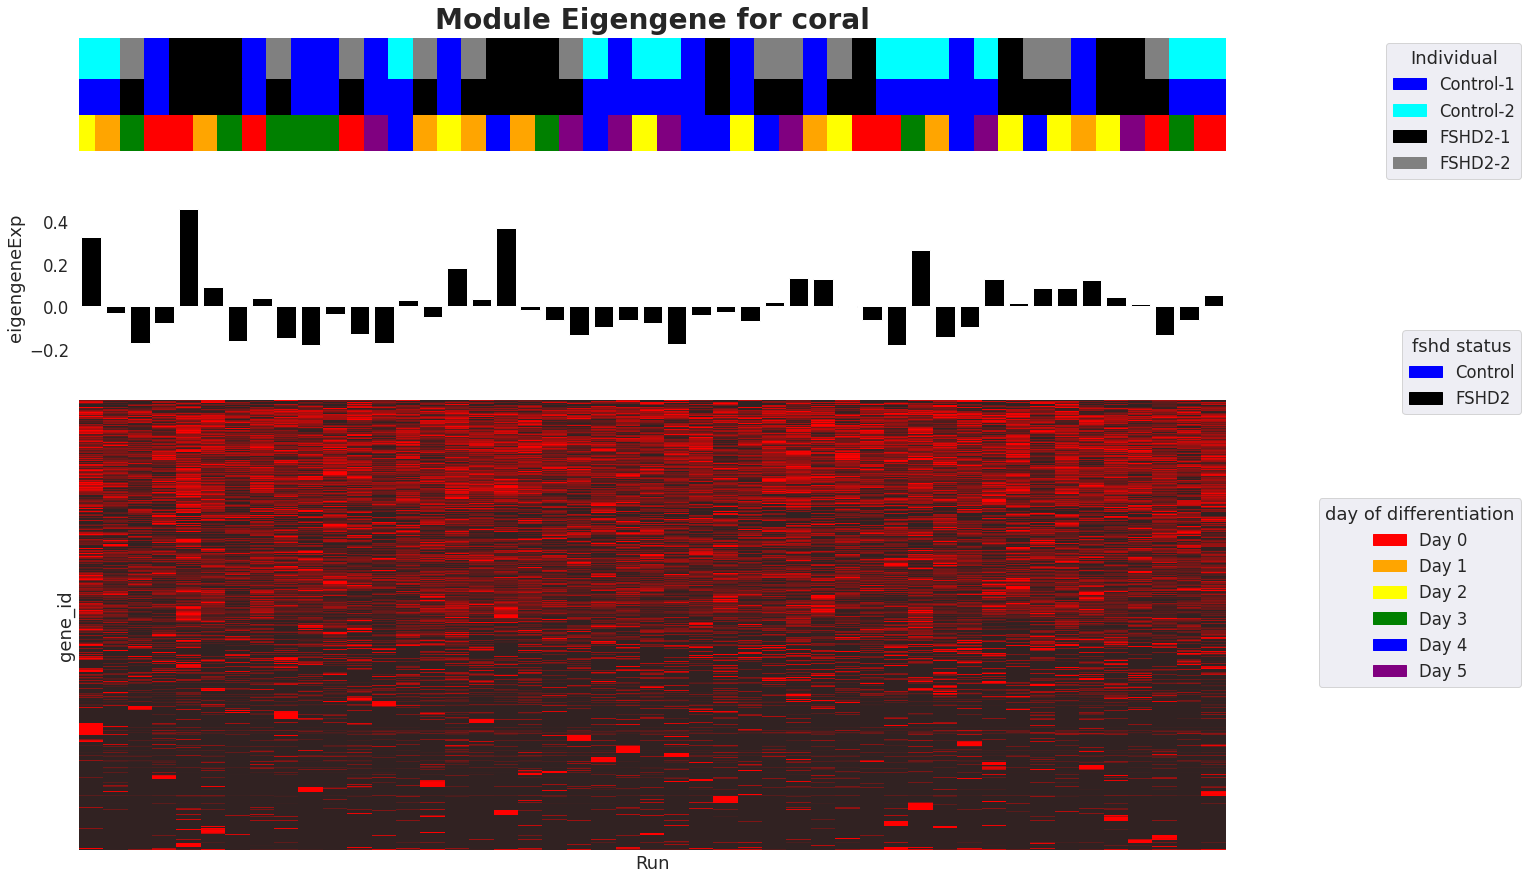

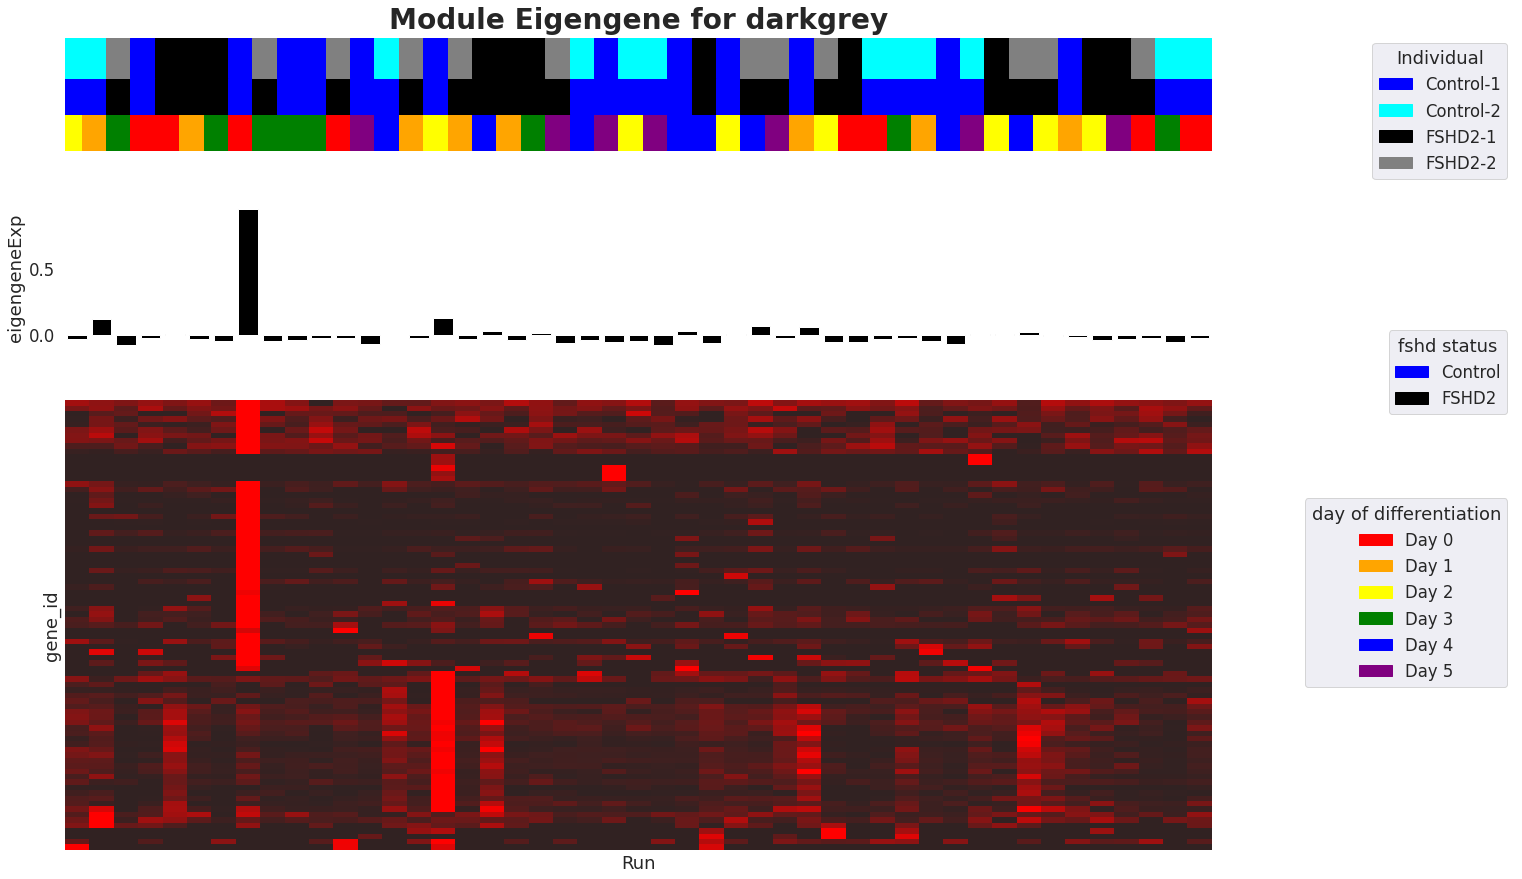

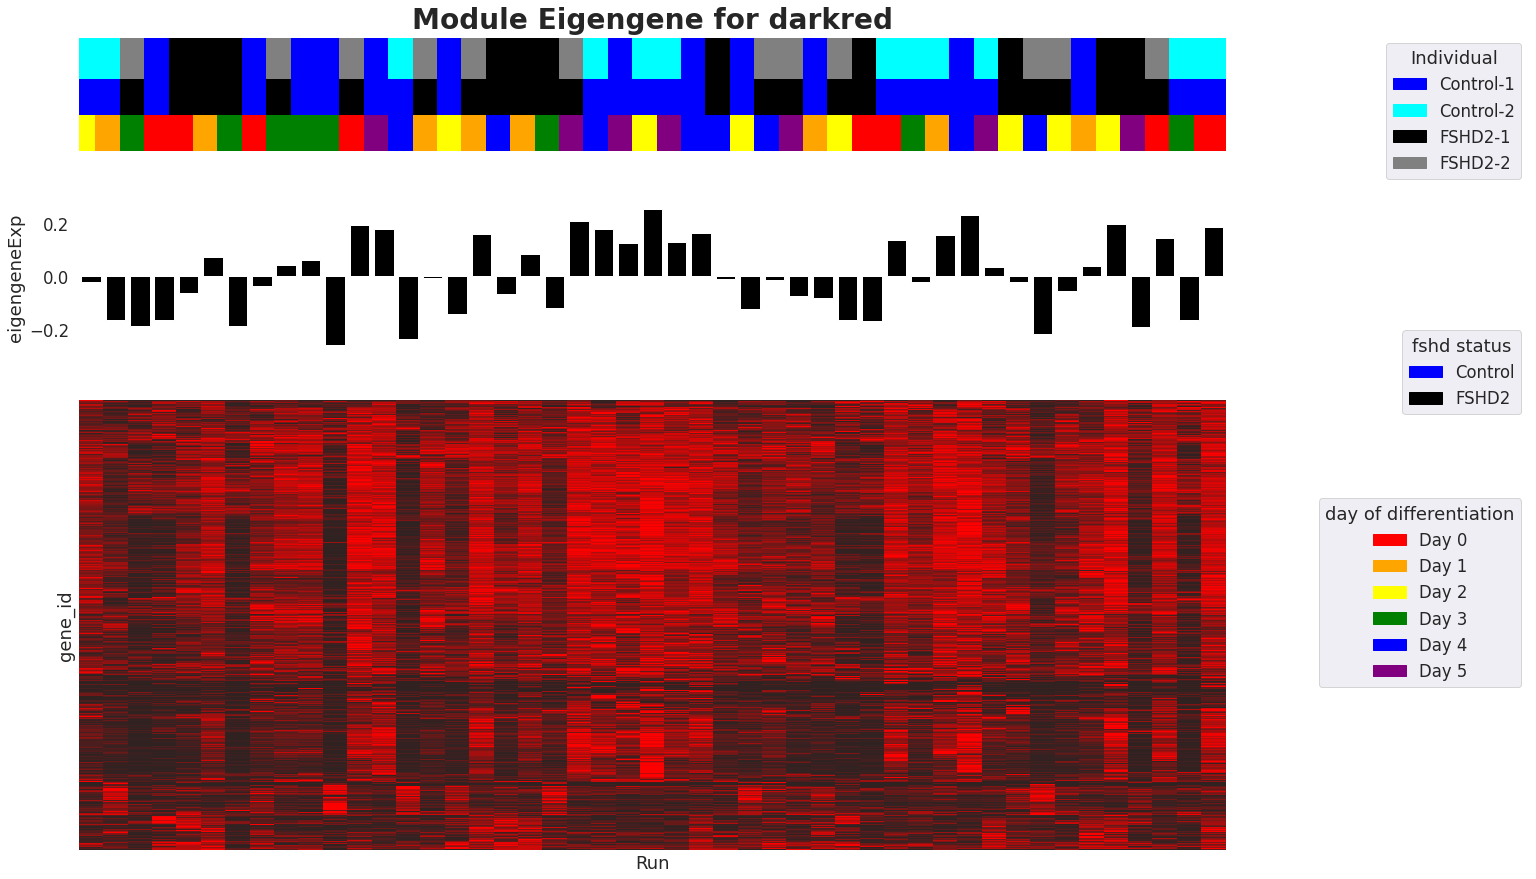

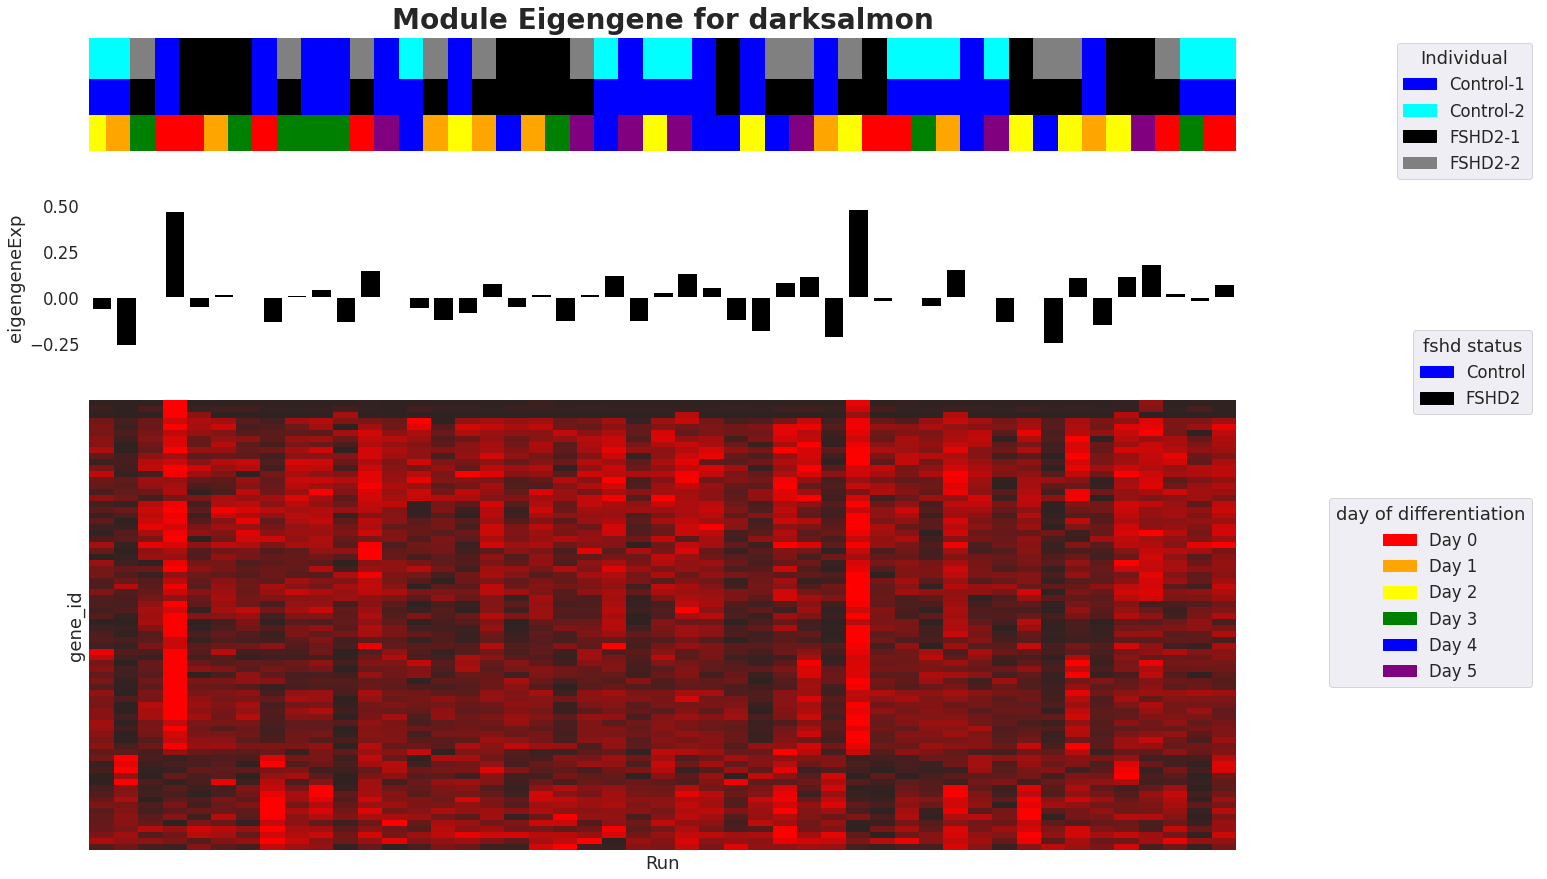

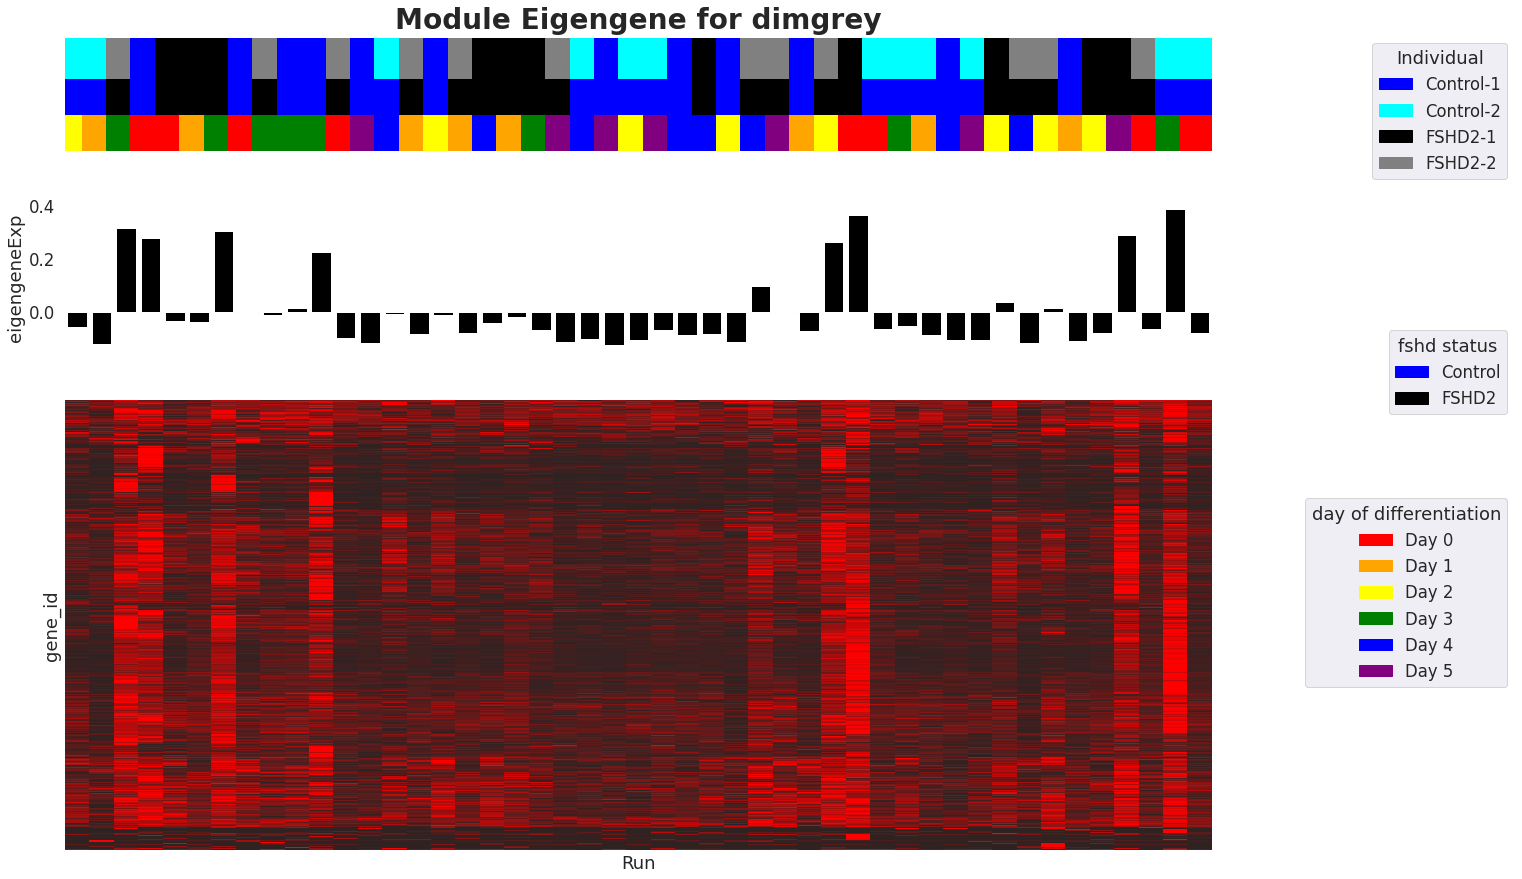

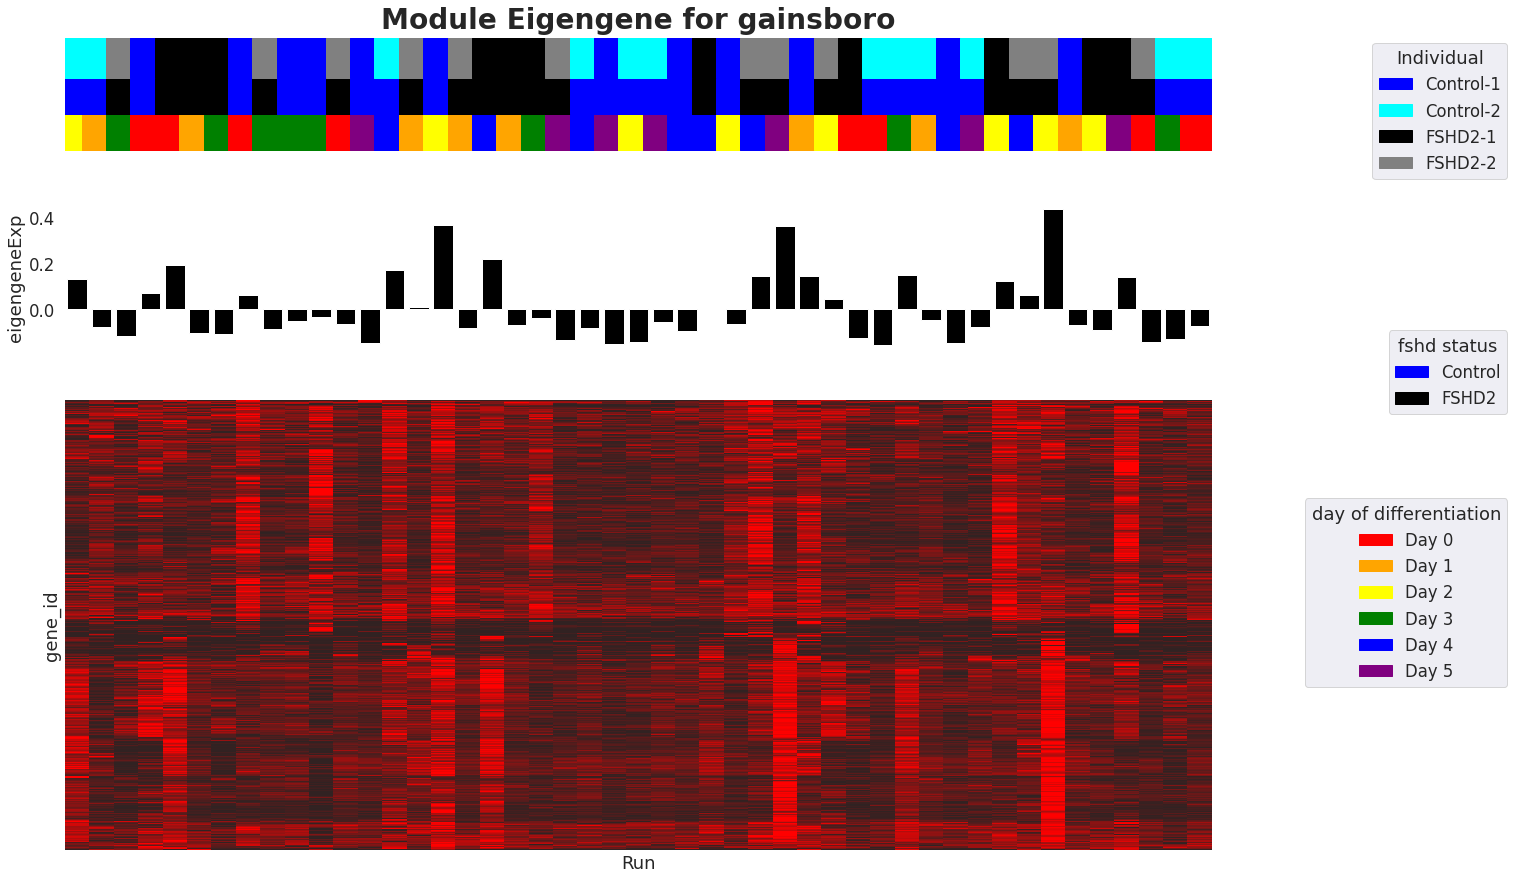

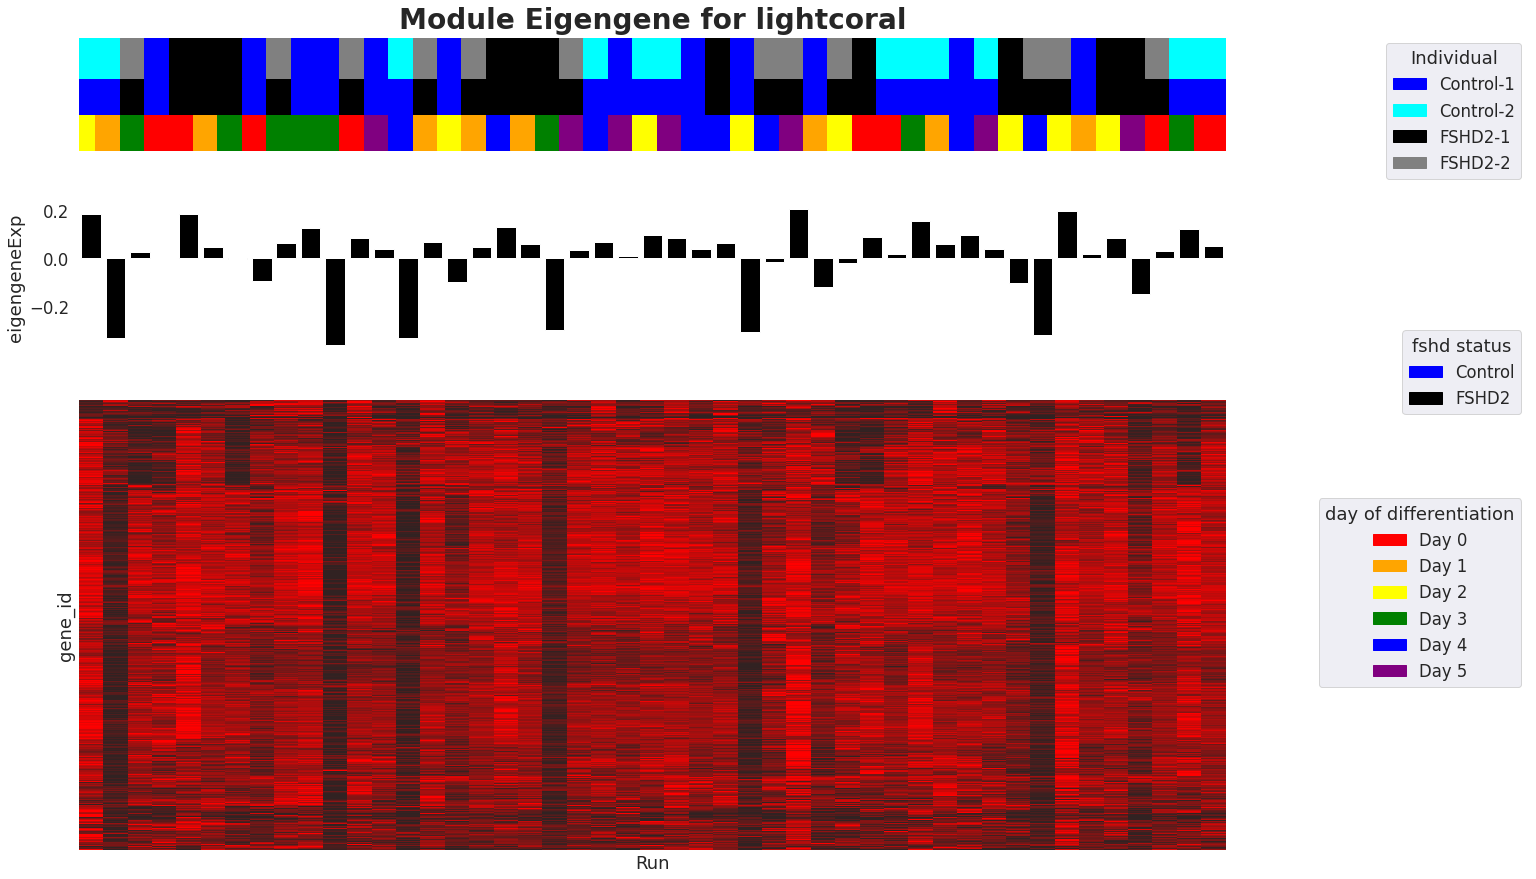

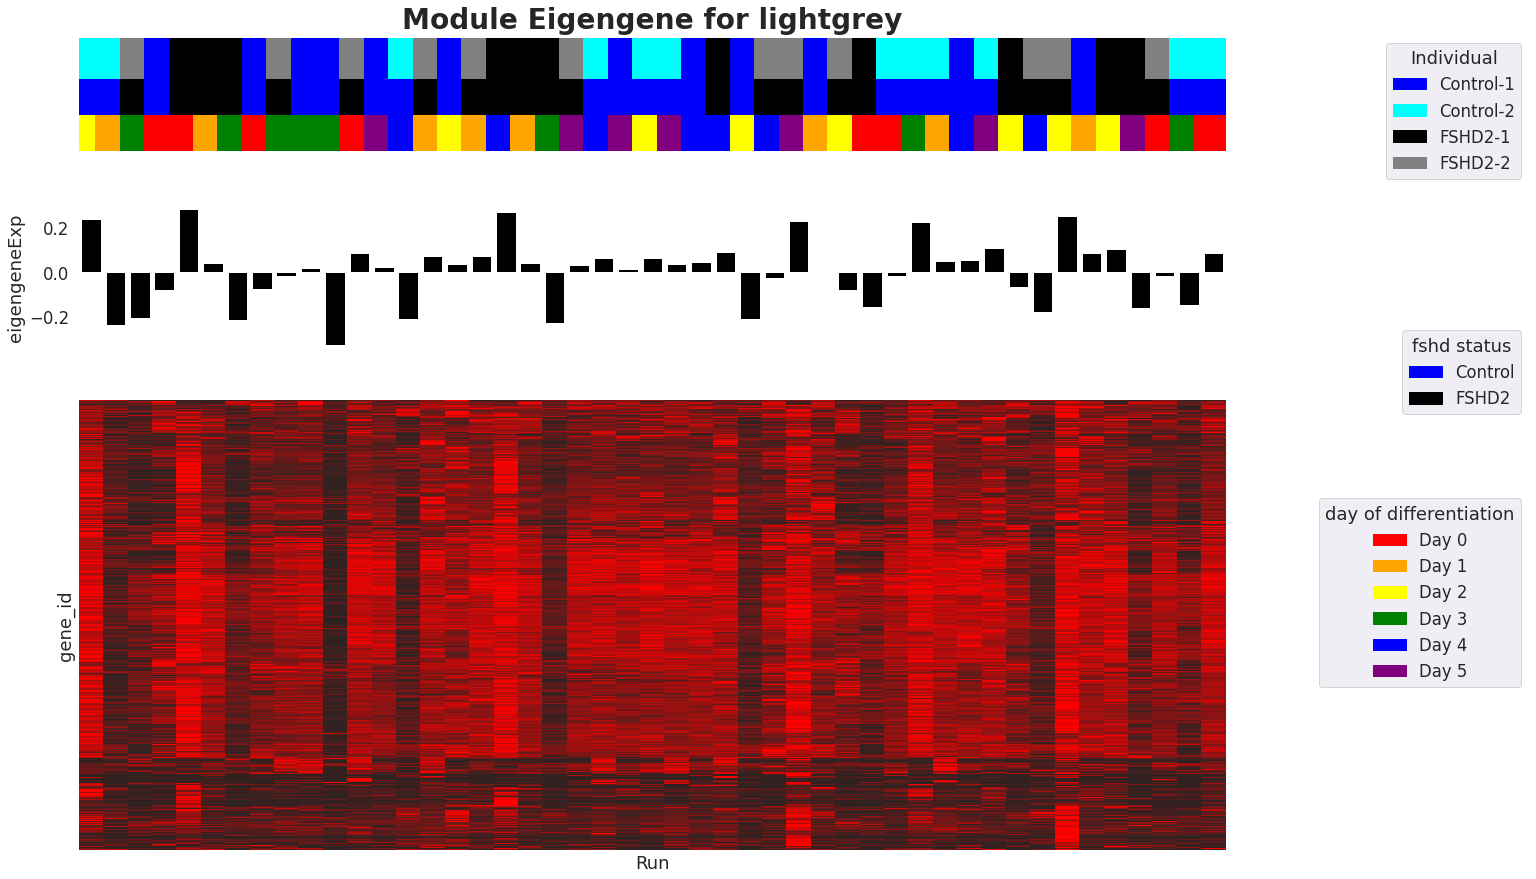

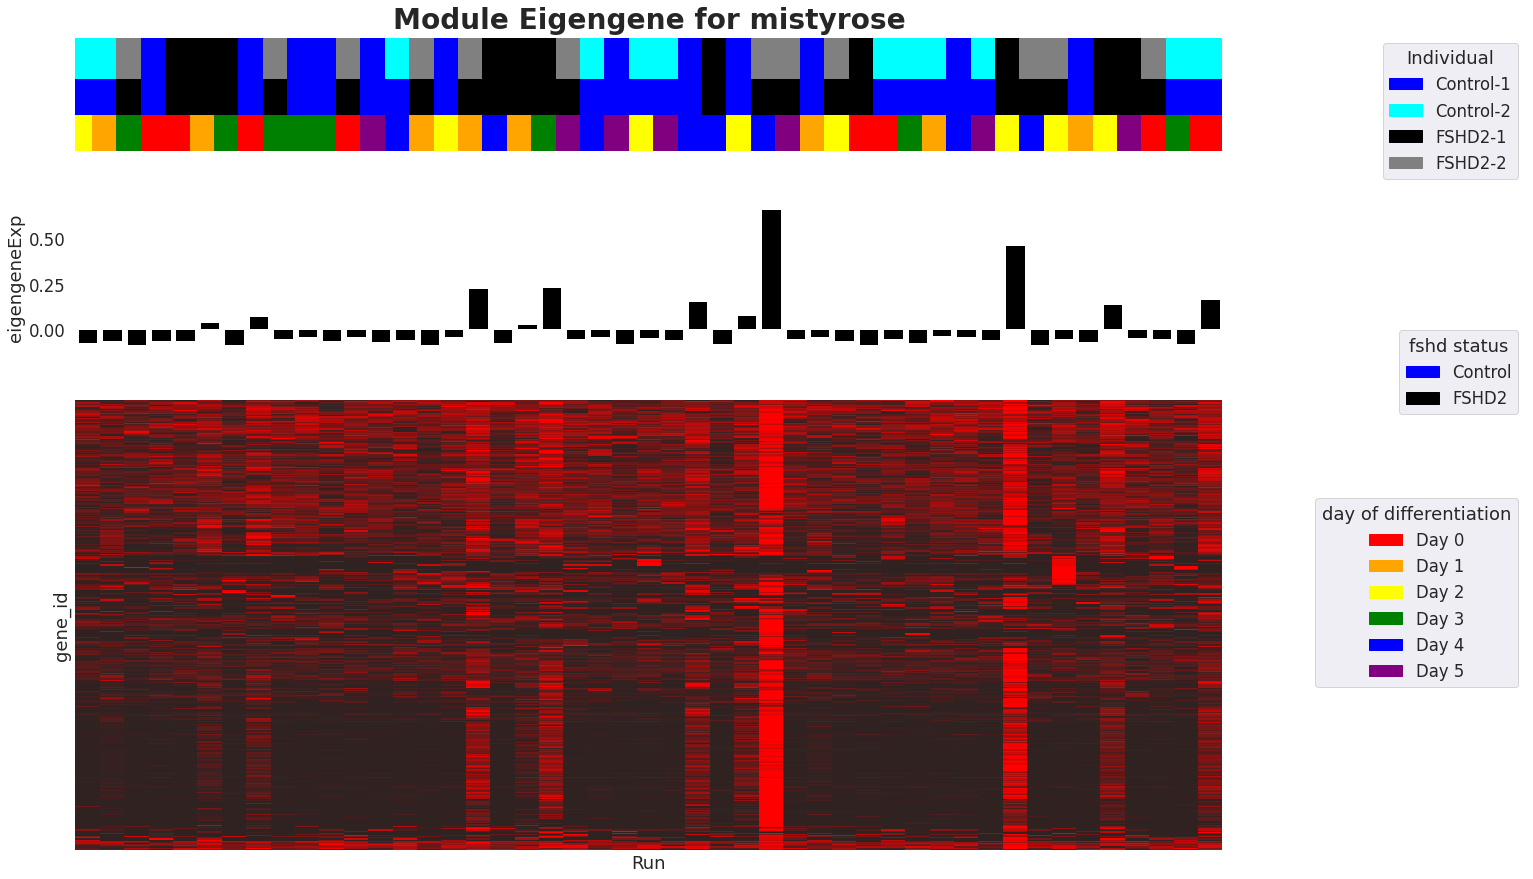

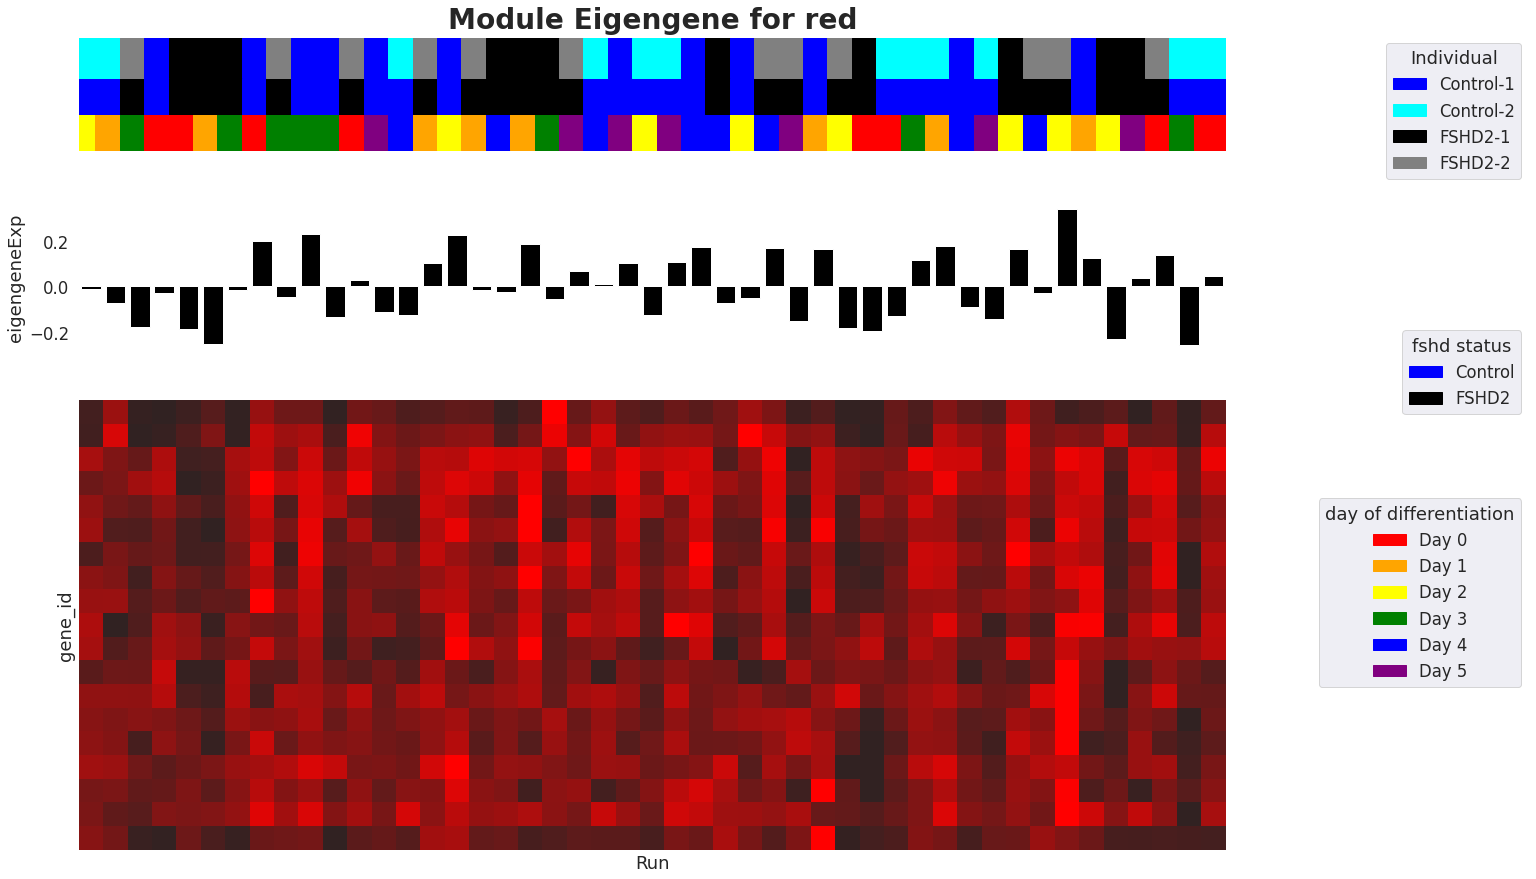

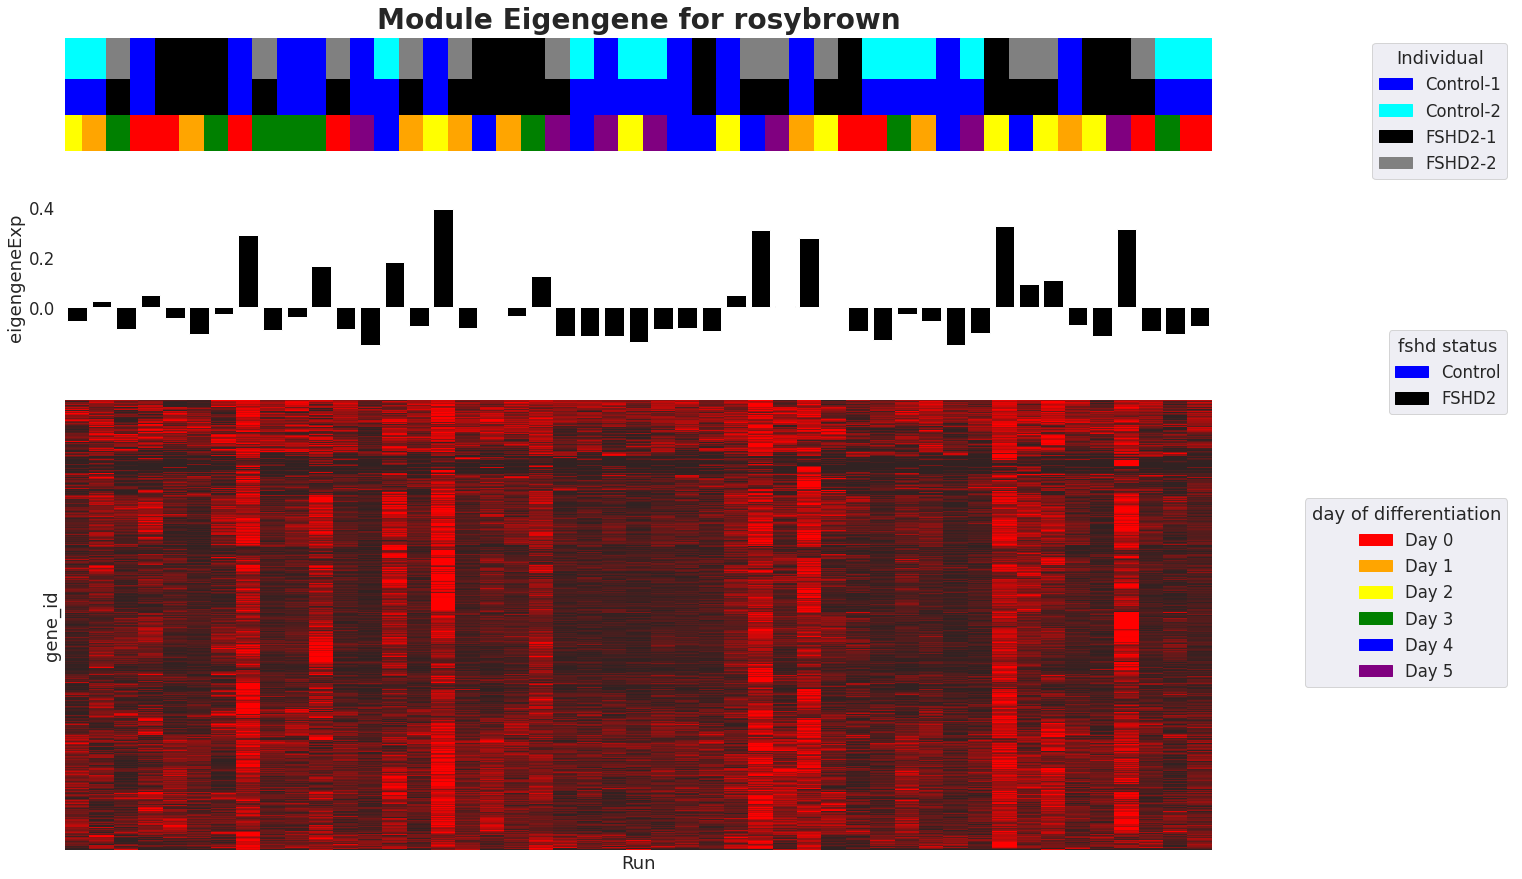

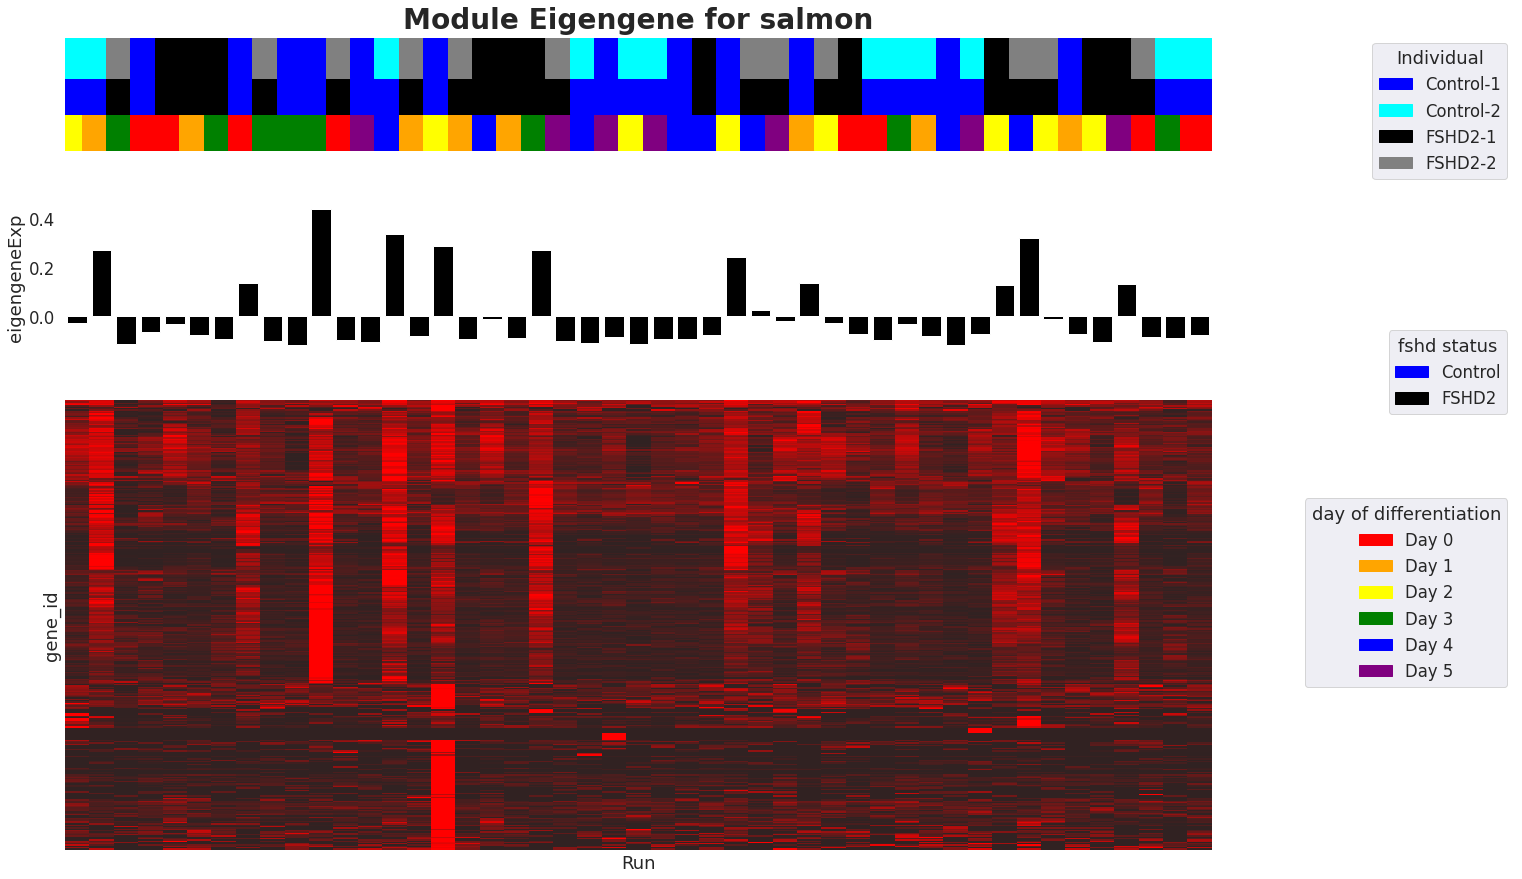

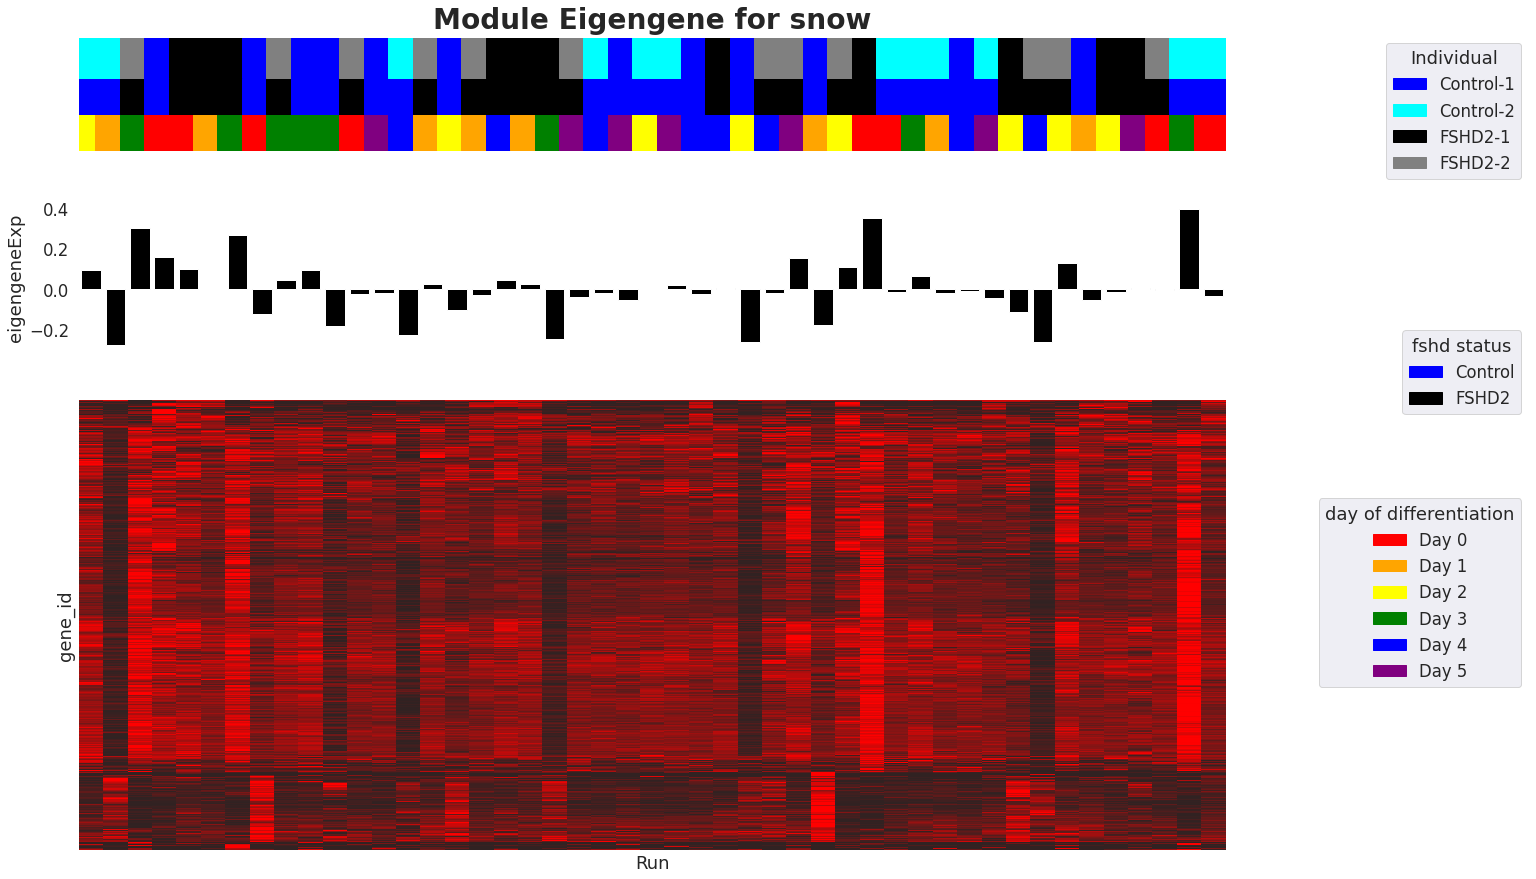

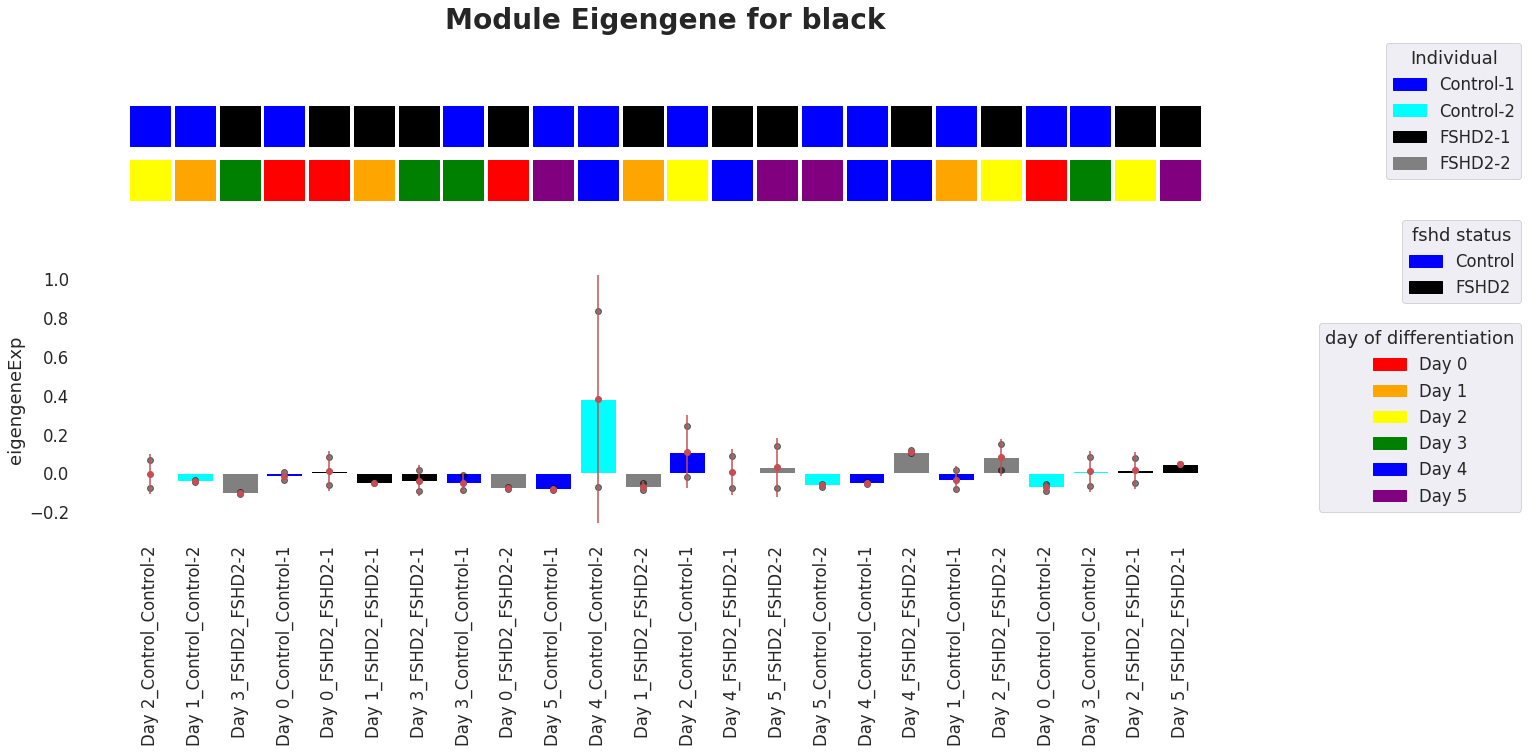

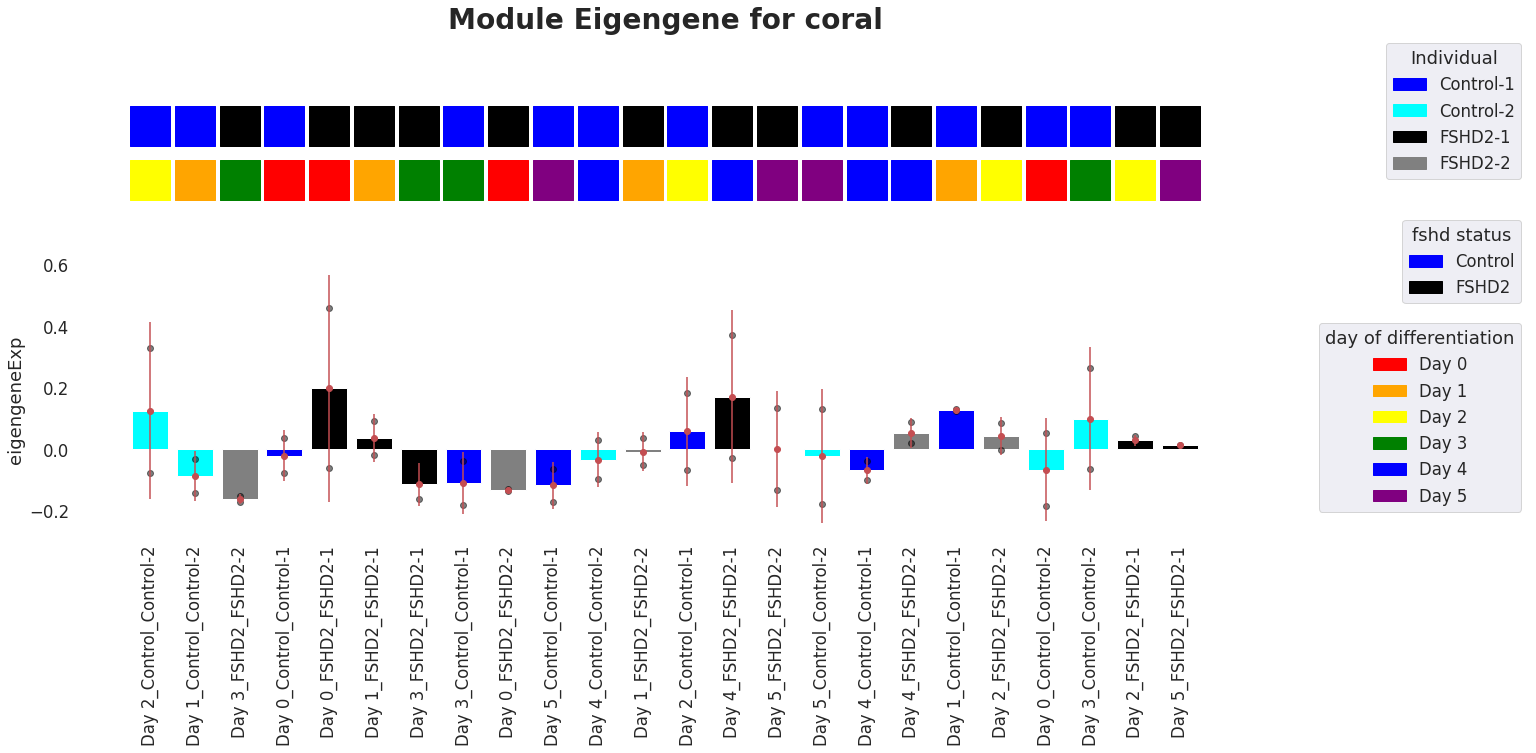

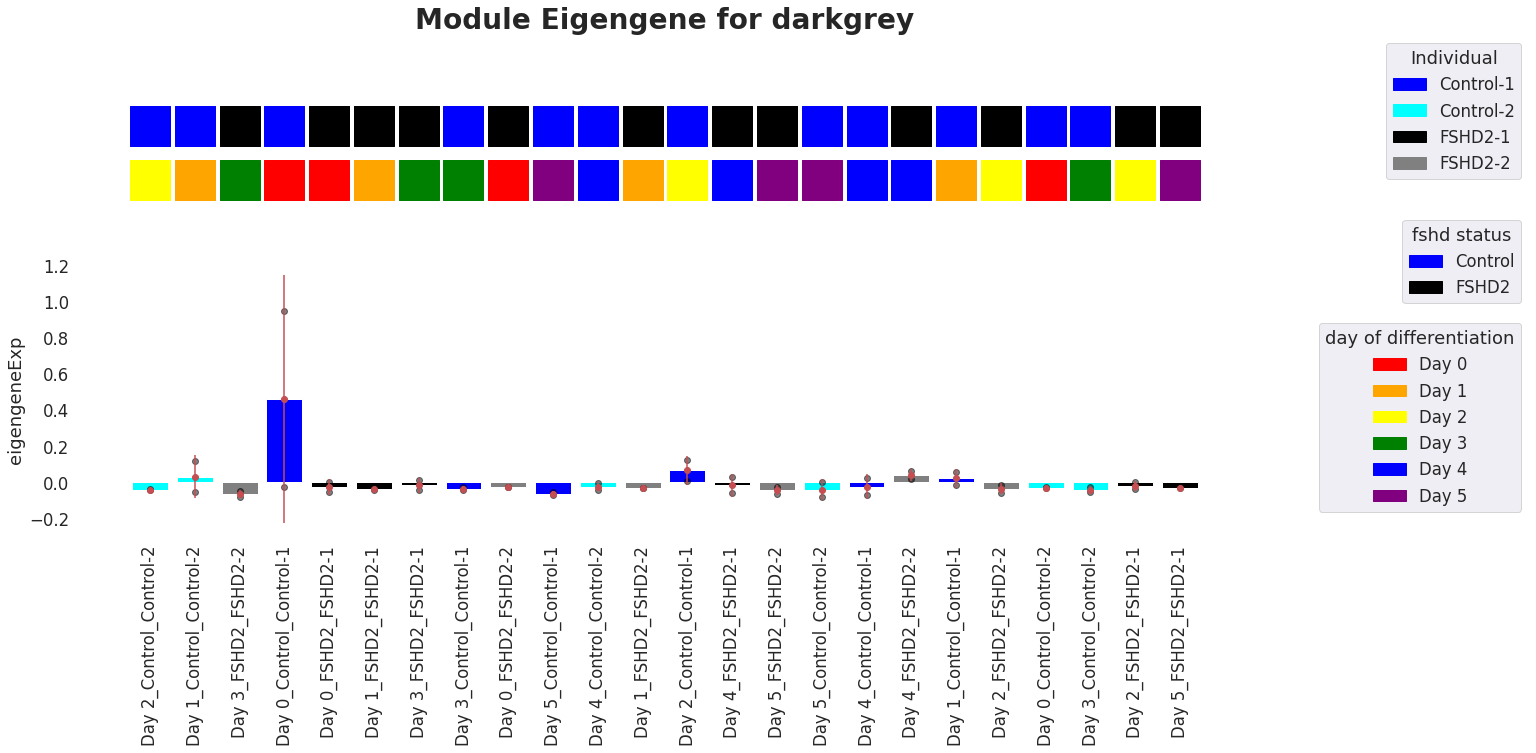

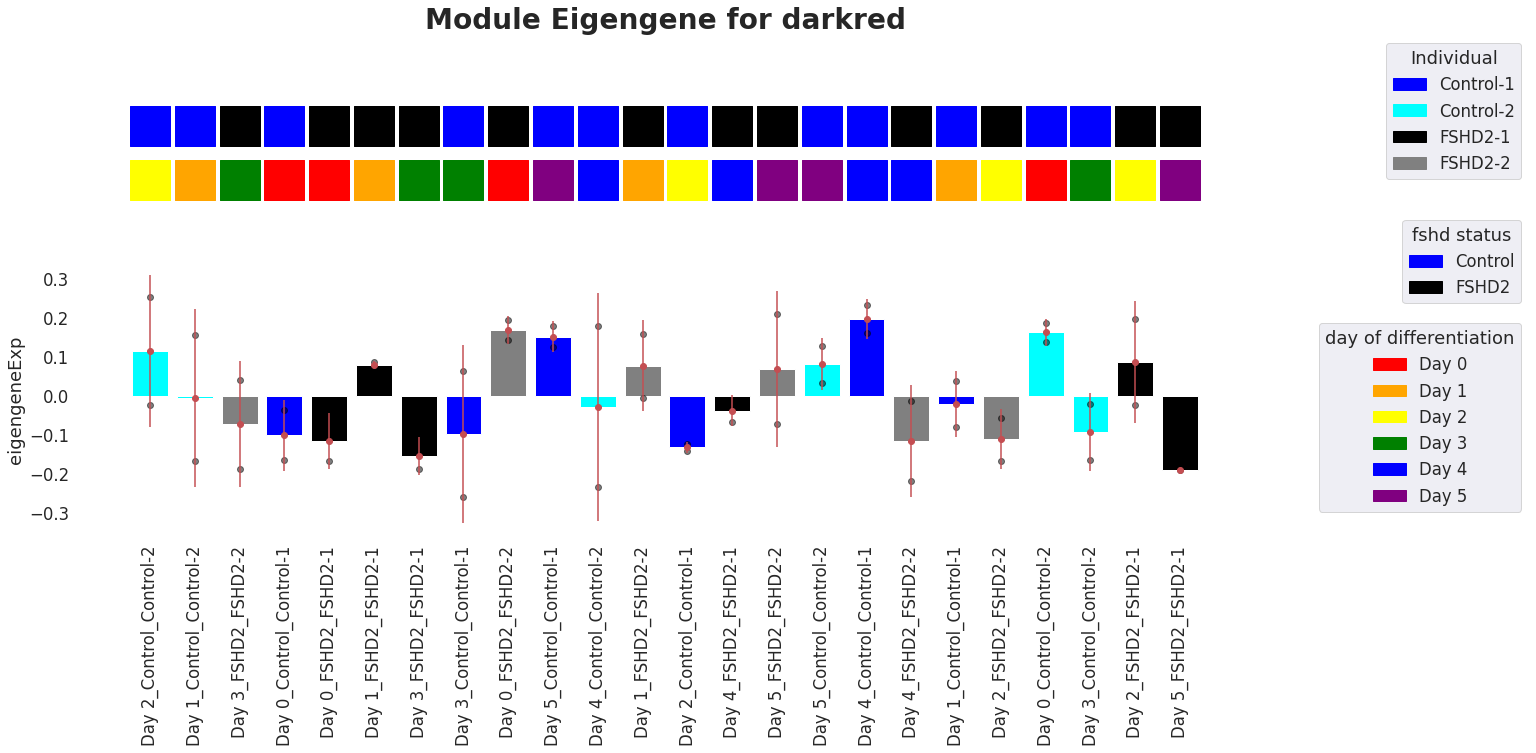

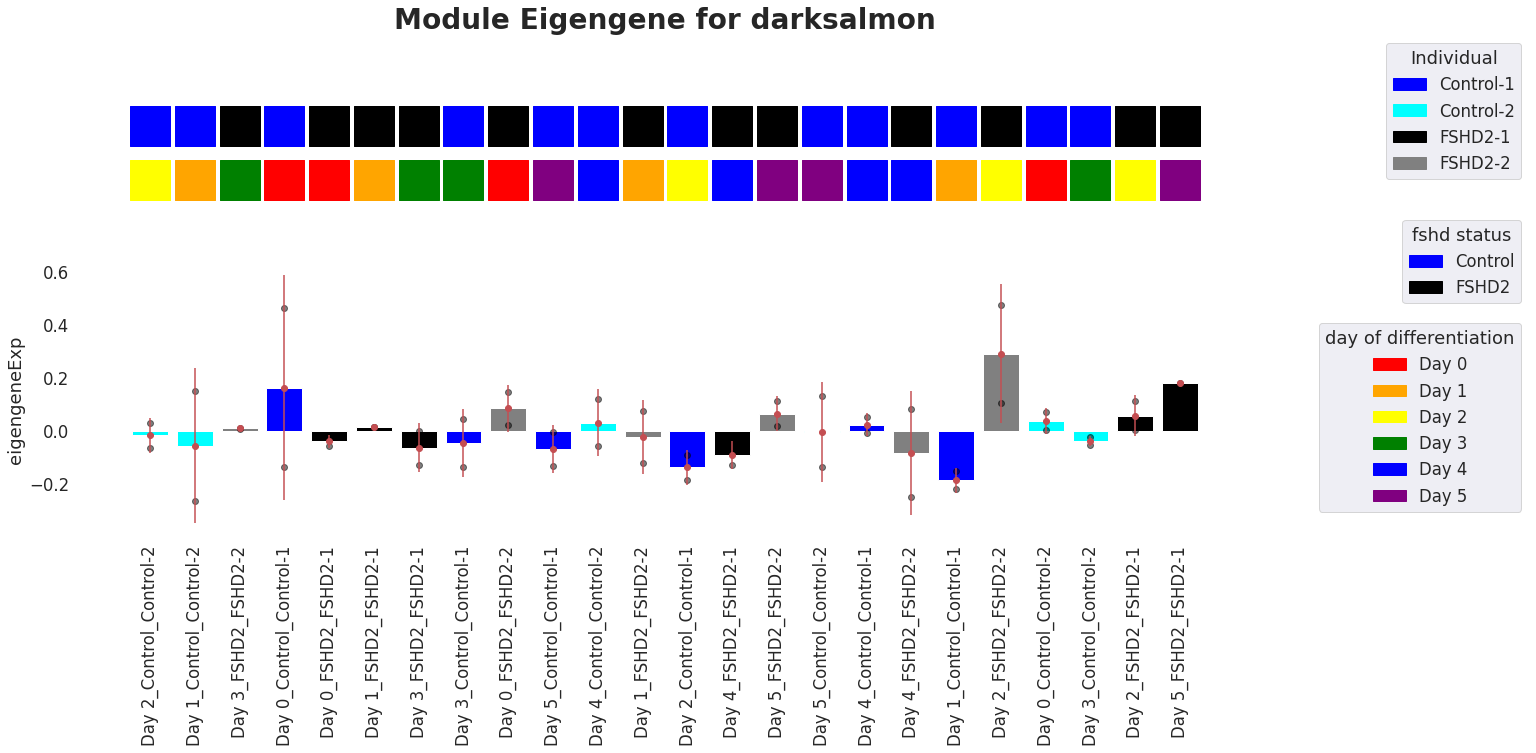

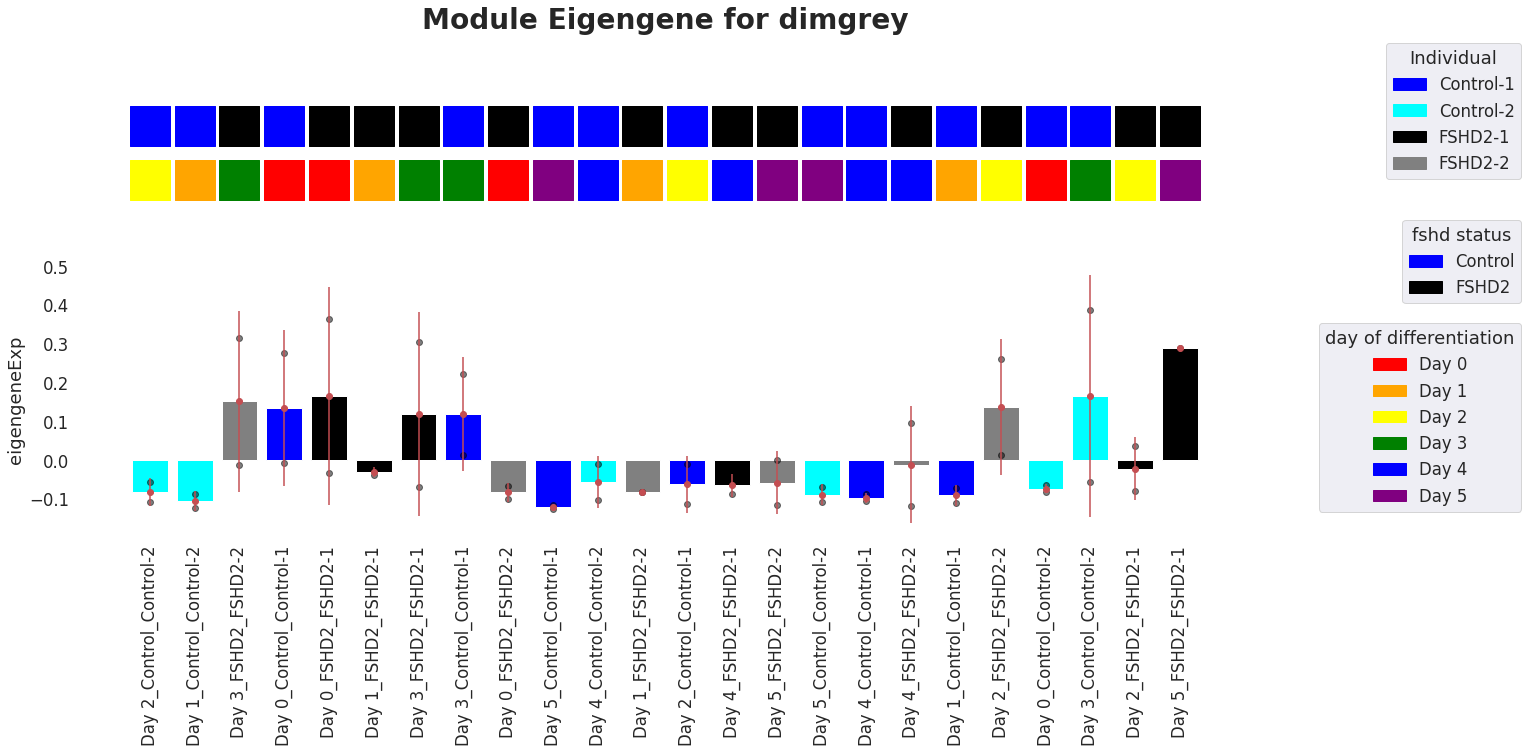

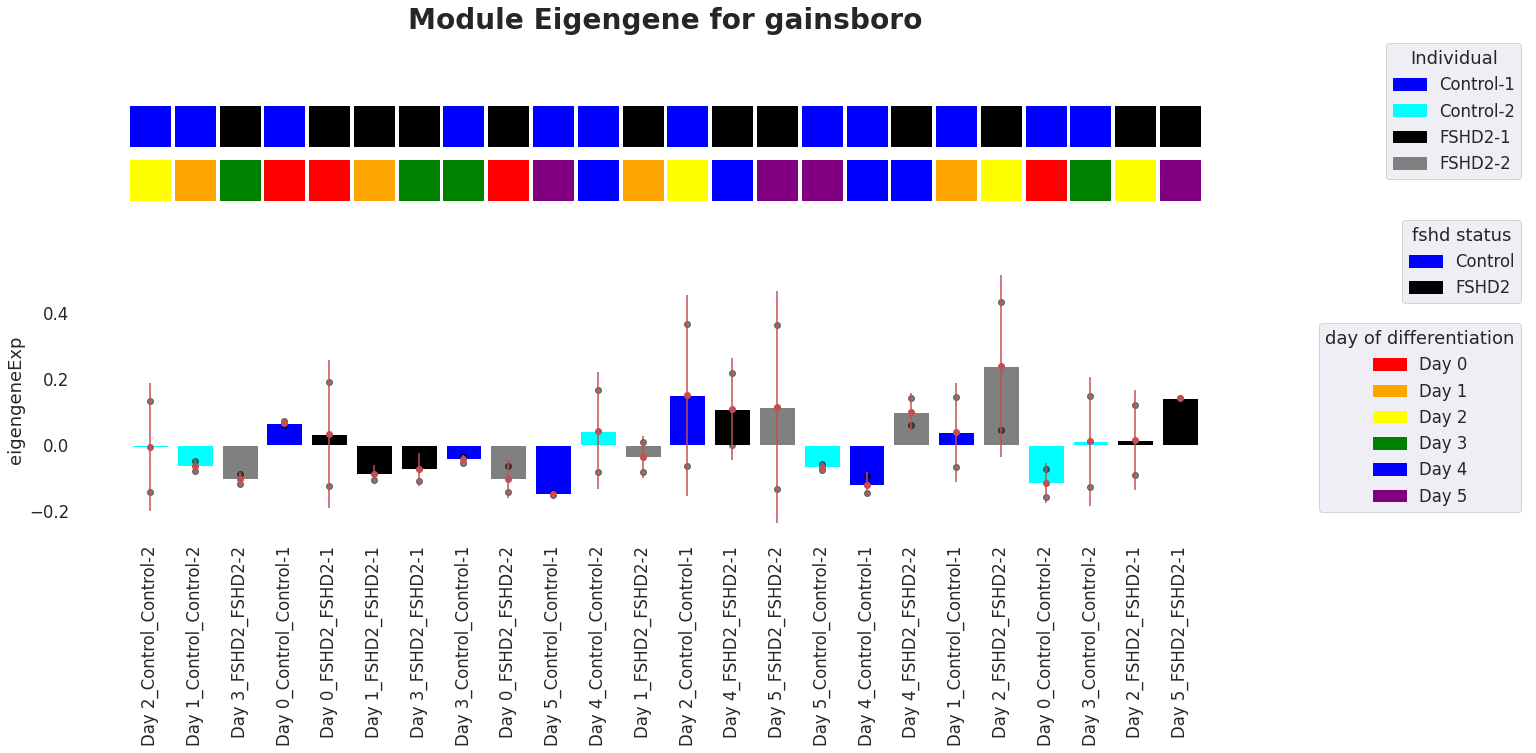

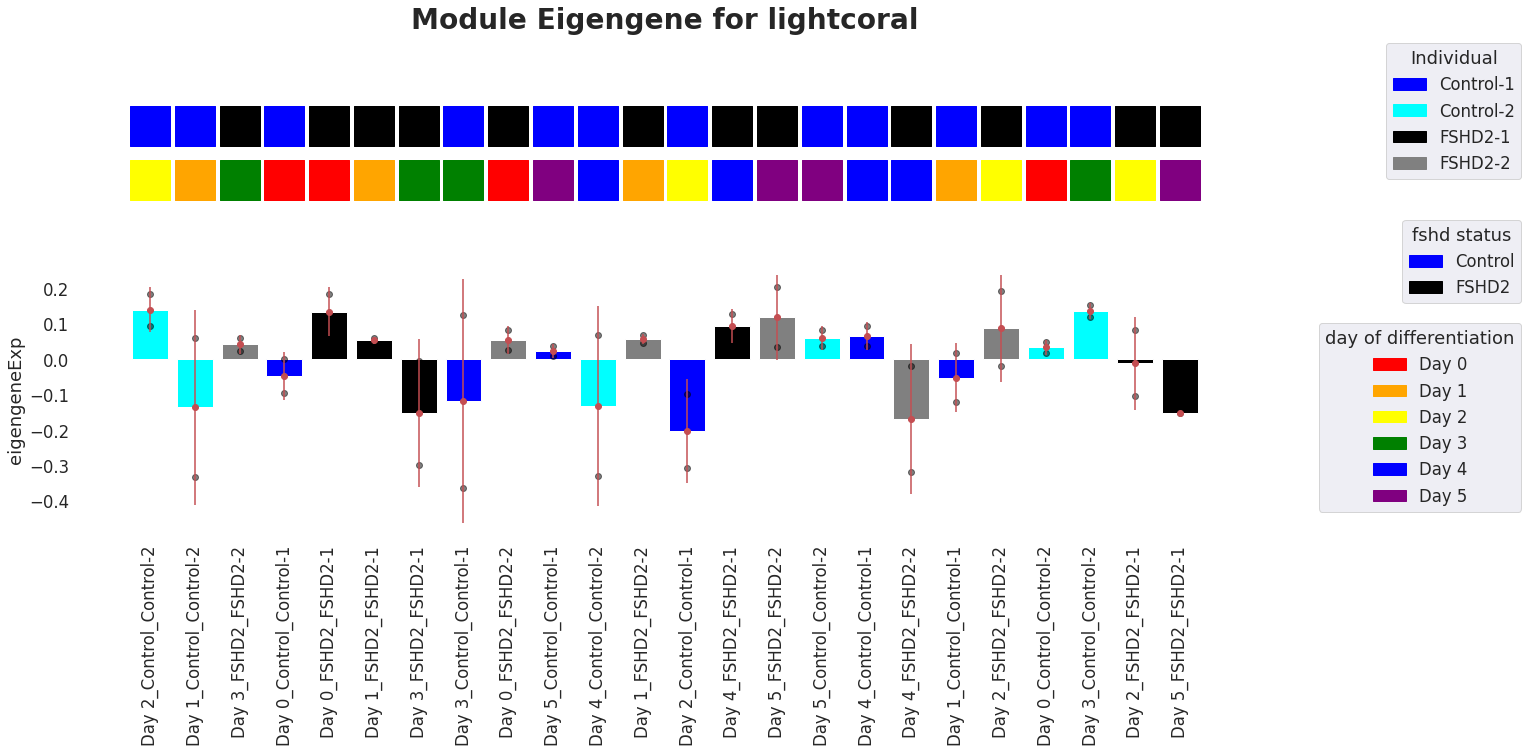

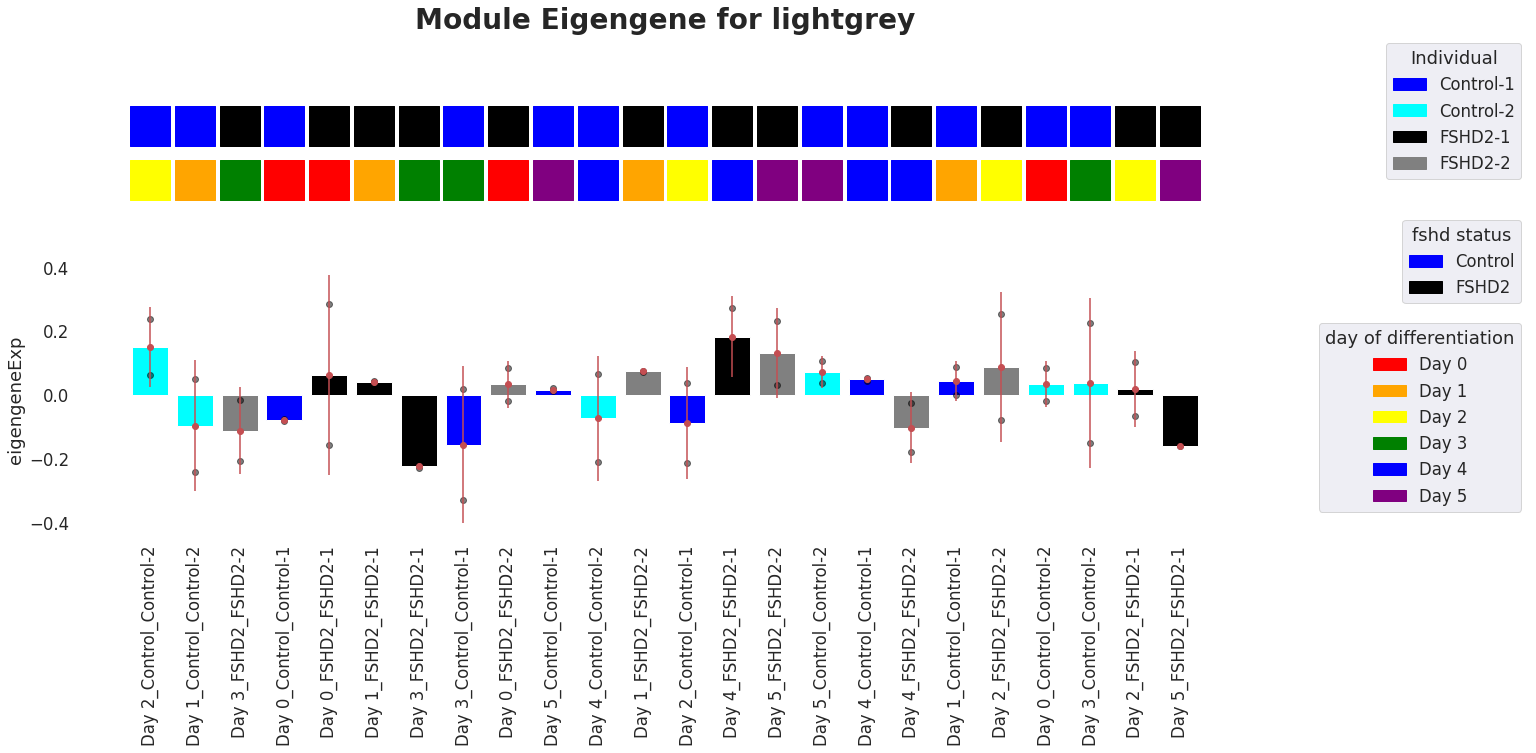

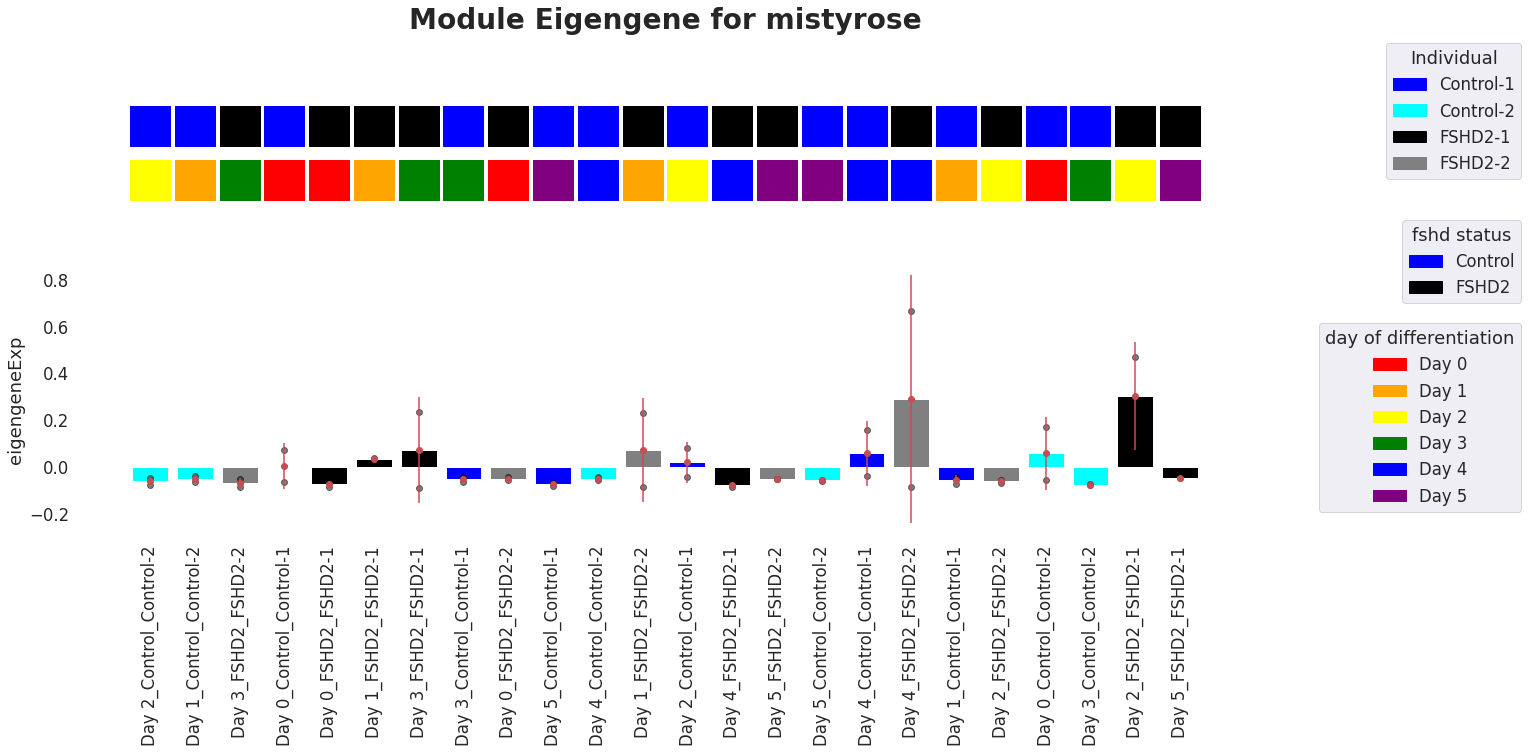

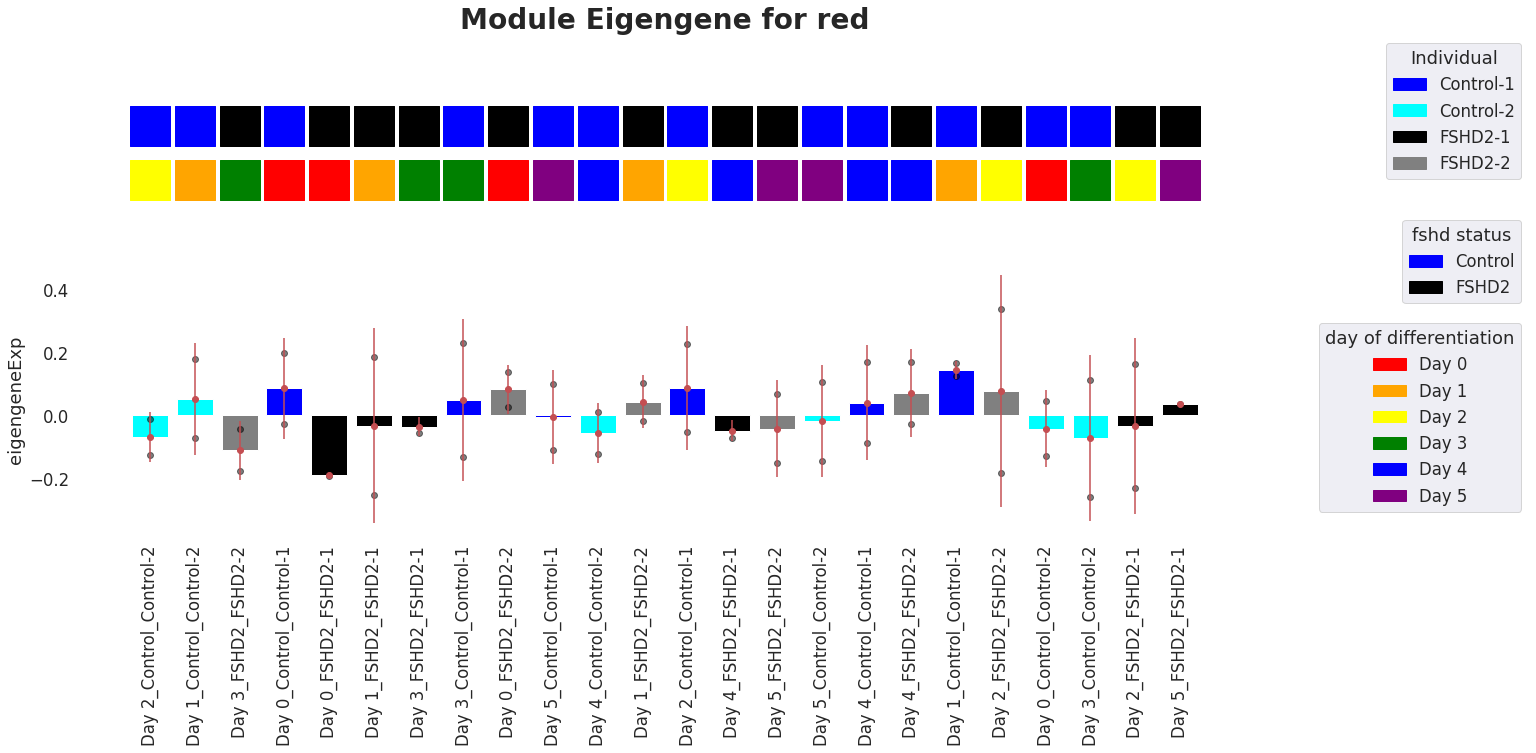

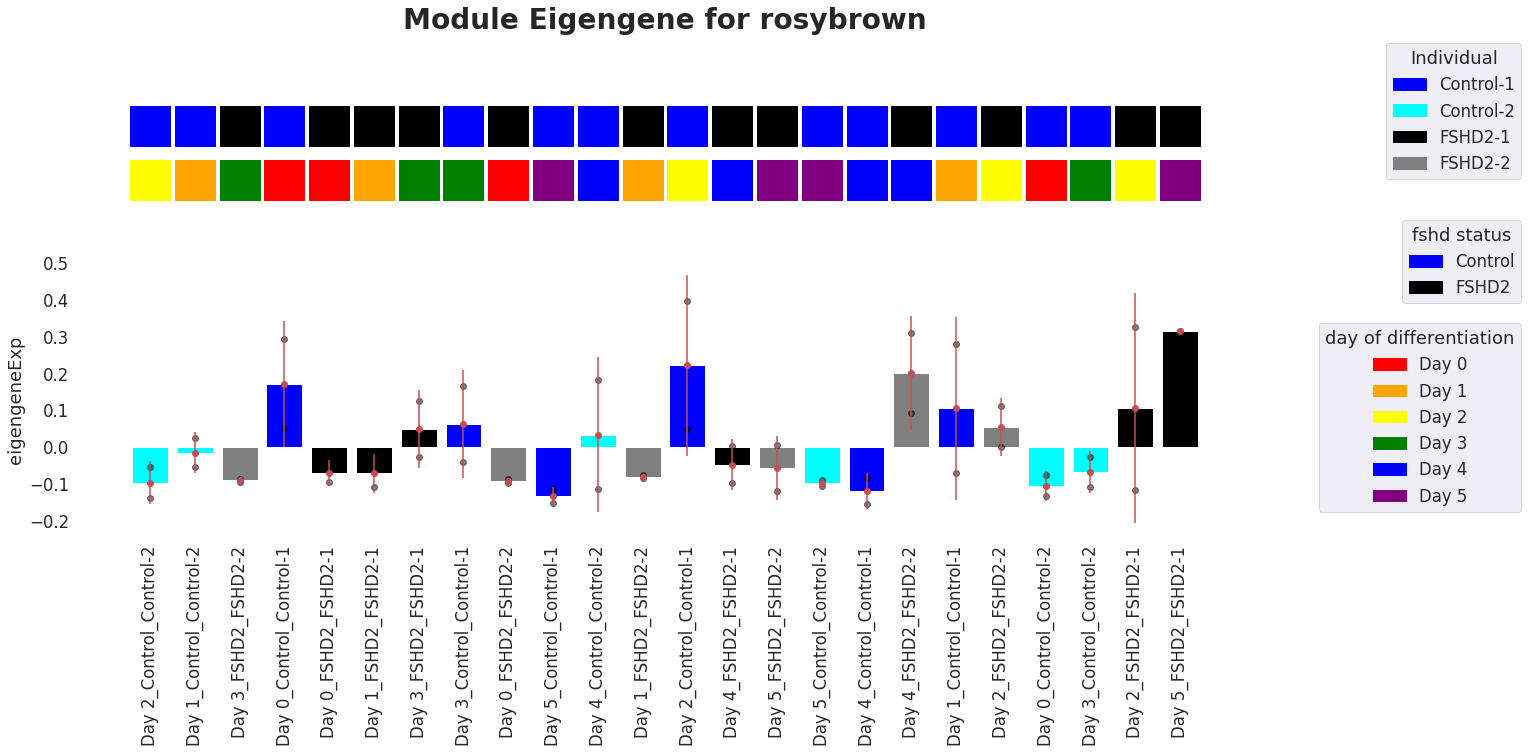

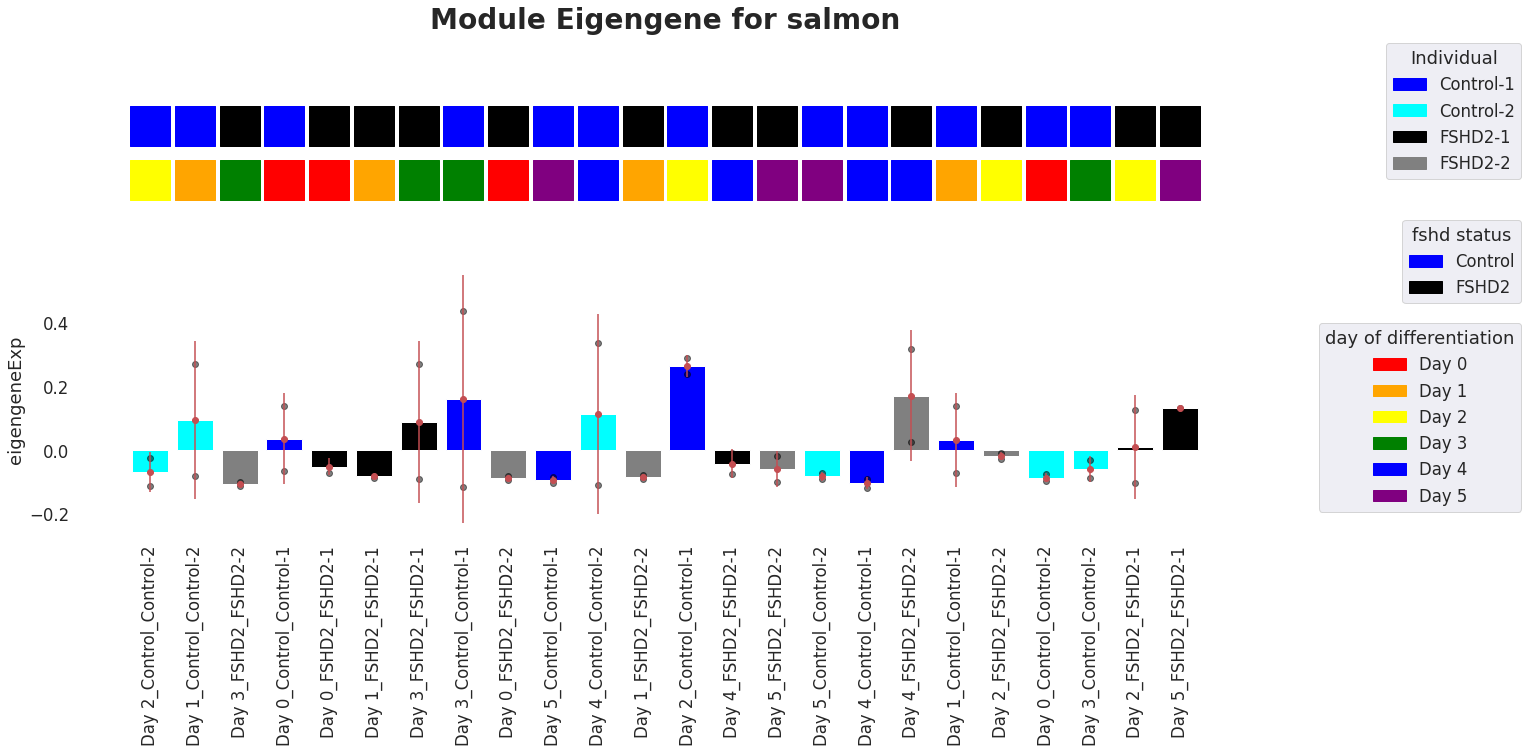

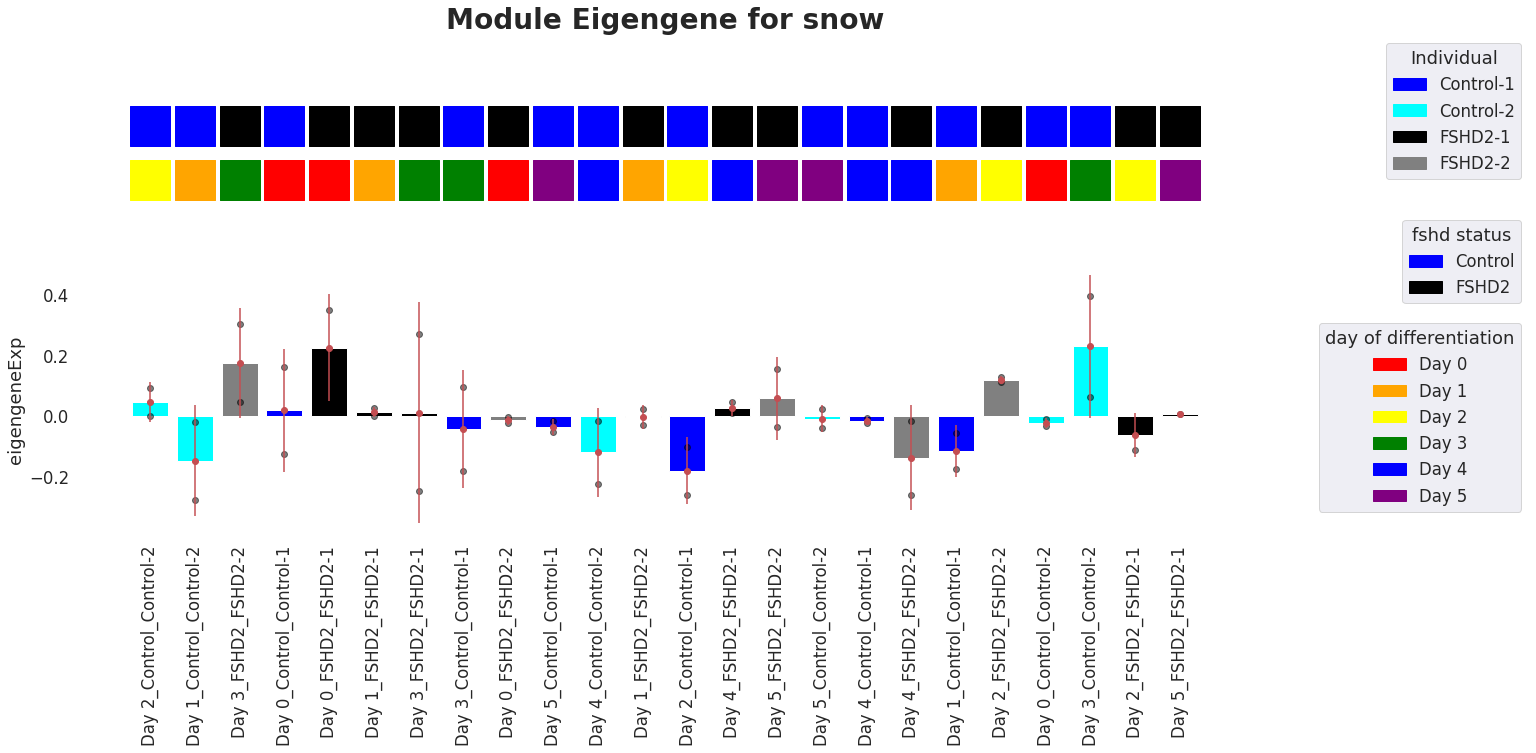

In [10]:
fshd.analyseWGCNA(geneList=geneList)

# save PyWGCNA object

In [12]:
fshd.saveWGCNA()

Saving WGCNA as fshd_example.p


# Read PyWGCNA object

In [13]:
## Read PyWGCNA object
import sys
import PyWGCNA
fshd = PyWGCNA.readWGCNA("fshd_example.p")

Reading fshd_example WGCNA done!


# How to work with object

## Extract gene list for each module and save it as a csv file

In [14]:
# module you're interested in
module = "mistyrose"
geneList = fshd.datExpr.var[fshd.datExpr.var.moduleColors == module]
geneList
# save gene list as MODULE.csv near object file
geneList.to_csv(fshd.outputPath + '/' + module + '.csv')
geneList

dynamicColors moduleColors  moduleLabels gene_name  \
gene_id                                                              
ENSG00000227372     mistyrose    mistyrose           9.0  TP73-AS1   
ENSG00000158286     mistyrose    mistyrose           9.0    RNF207   
ENSG00000162444     mistyrose    mistyrose           9.0      RBP7   
ENSG00000116663     mistyrose    mistyrose           9.0     FBXO6   
ENSG00000116691     mistyrose    mistyrose           9.0      MIIP   
...                       ...          ...           ...       ...   
ENSG00000270533     mistyrose    mistyrose           9.0             
ENSG00000154639     mistyrose    mistyrose           9.0     CXADR   
ENSG00000142197     mistyrose    mistyrose           9.0     DOP1B   
ENSG00000159261     mistyrose    mistyrose           9.0    CLDN14   
ENSG00000233767     mistyrose    mistyrose           9.0   PSMA6P3   

                                            go_id  
gene_id                                            
ENSG00000227372    transcribed_unitary_pseudogene  
ENSG00000158286                    protein_coding  
ENSG00000162444                    protein_coding  
ENSG00000116663                    protein_coding  
ENSG00000116691                    protein_coding  
...                                           ...  
ENSG00000270533  transcribed_processed_pseudogene  
ENSG00000154639                    protein_coding  
ENSG00000142197                    protein_coding  
ENSG00000159261                    protein_coding  
ENSG00000233767              processed_pseudogene  

[397 rows x 5 columns]

## Gene ontology table

In [15]:
# module you're interested in
module = "mistyrose"
file_name = fshd.outputPath + '/figures/GO/' + module + '/GO_Biological_Process_2021.Human.enrichr.reports.txt'
geneOntoloy = pd.read_csv(file_name, sep='\t')
geneOntoloy

Gene_set  \
0     GO_Biological_Process_2021   
1     GO_Biological_Process_2021   
2     GO_Biological_Process_2021   
3     GO_Biological_Process_2021   
4     GO_Biological_Process_2021   
...                          ...   
1390  GO_Biological_Process_2021   
1391  GO_Biological_Process_2021   
1392  GO_Biological_Process_2021   
1393  GO_Biological_Process_2021   
1394  GO_Biological_Process_2021   

                                                   Term Overlap   P-value  \
0     regulation of macromolecule metabolic process ...  11/200  0.001018   
1                    eosinophil chemotaxis (GO:0048245)    3/16  0.002700   
2                     eosinophil migration (GO:0072677)    3/16  0.002700   
3     purine ribonucleoside metabolic process (GO:00...     2/7  0.006357   
4     cardiac muscle cell-cardiac muscle cell adhesi...     2/7  0.006357   
...                                                 ...     ...       ...   
1390                 DNA metabolic process (GO:0006259)   1/277  0.993605   
1391        chemical synaptic transmission (GO:0007268)   1/306  0.996246   
1392  regulation of nucleic acid-templated transcrip...   2/430  0.996560   
1393  cellular macromolecule biosynthetic process (G...   1/314  0.996760   
1394  regulation of intracellular signal transductio...   1/437  0.999663   

      Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0             0.664068            0                     0    3.253238   
1             0.664068            0                     0   12.723420   
2             0.664068            0                     0   12.723420   
3             0.664068            0                     0   22.001120   
4             0.664068            0                     0   22.001120   
...                ...          ...                   ...         ...   
1390          0.996462            0                     0    0.195986   
1391          0.997475            0                     0    0.177086   
1392          0.997475            0                     0    0.251486   
1393          0.997475            0                     0    0.172488   
1394          0.999663            0                     0    0.123040   

      Combined Score                                              Genes  
0          22.415790  TRIM60;TRIM51;TRIM64B;GDNF;DPPA3;ZFP64;TRIM49B...  
1          75.254300                                    CCL7;CCL2;CCL26  
2          75.254300                                    CCL7;CCL2;CCL26  
3         111.287100                                NT5C1B;NT5C1B-RDH14  
4         111.287100                                          DSP;CXADR  
...              ...                                                ...  
1390        0.001257                                              FBXO6  
1391        0.000666                                            SLC12A6  
1392        0.000867                                      DENND4A;APBB1  
1393        0.000560                                              NR4A2  
1394        0.000041                                              F2RL1  

[1395 rows x 10 columns]